<a href="https://colab.research.google.com/github/arshadaafaq/Coronavirus_tweets_sentiment_analysis/blob/main/Coronavirus_tweets_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Coronavirus Tweet Sentiment Analysis




##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 - Arshad Aafaq D**
##### **Team Member 2 - Kaveri Shende**
##### **Team Member 3 - Vamshi**
##### **Team Member 4 - Shubam**
##### **Team Member 5 - Yogesh**

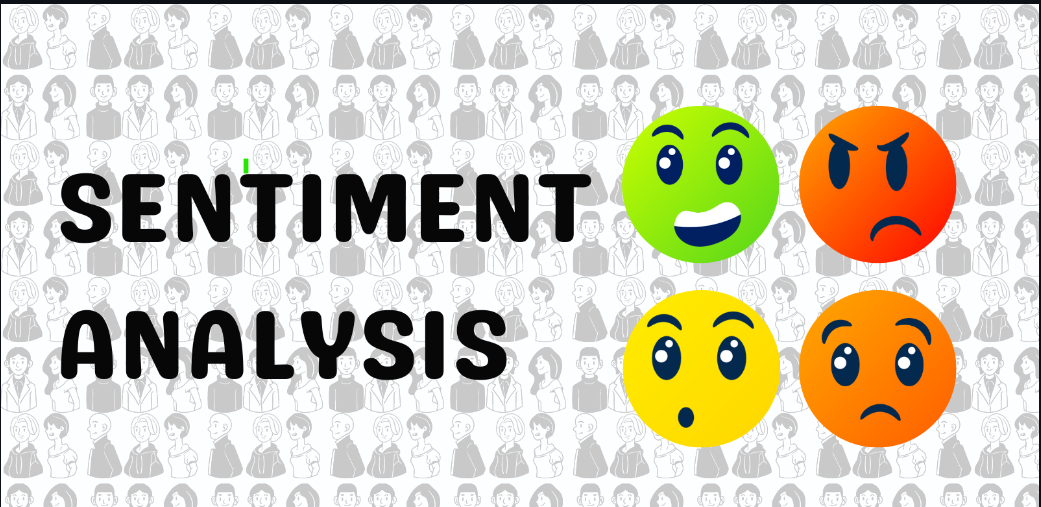

# **Project Summary -**

To predict the sentiment of tweets using COVID-19, the research intends to develop a classification model. The dataset includes details such the user's identity, screen name, location, the timestamp of the tweet, and the text of the tweet itself. The sentiment of each tweet has been manually tagged. Preprocessing the text data, investigating and visualising the dataset, engineering feature sets, and creating and assessing classification models using machine learning techniques are all tasks included in the project. Metrics including accuracy, precision, recall, and F1 score will be used to assess the models' performance. The end goal is to create a model that can accurately predict the sentiment of COVID-19 tweets so that it may be used to understand how the public feels about the pandemic.

# **GitHub Link -**

https://github.com/arshadaafaq/Coronavirus_tweets_sentiment_analysis/tree/main

# **Problem Statement**


classification model to forecast the sentiment of COVID-19 tweets for this assignment.The tweets were downloaded from Twitter after which human tagging was completed.
To prevent any privacy problems, the names and usernames have been given codes.
Features of the dataset include:

1.UserName

2.ScreenName

3.Location

4.TweetAt

5.OriginalTweet

6.Sentiment


# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import package
import numpy as np
import pandas as pd

import ast
import re # for regular expression operations like lower, remove spaces n all
import string
from datetime import datetime as dt
from datetime import date
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,roc_curve

In [ ]:
# NLP Libraries
import nltk # for text manipulation
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
tweets= pd.read_csv('/content/drive/MyDrive/Tweets/Coronavirus Tweets.csv',encoding='latin')


In [ ]:
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
tweets['TweetAt'] = tweets['TweetAt'].apply(lambda x: dt.strptime(x,'%d-%m-%Y'))

### Dataset First View

In [ ]:
# Dataset First Look
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
tweets.shape

(41157, 6)

### Dataset Information

In [ ]:
# Dataset Info
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       32567 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.9+ MB


As we saw in the cell above that there are some null values present in the 'Location' column.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
tweets.duplicated().sum()

0

There are no duplicates values in this dataset

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
tweets.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

<Axes: >

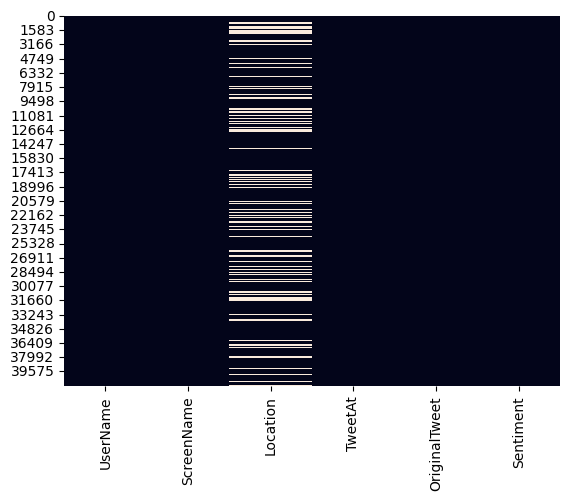

In [ ]:
# Visualizing the missing values
sns.heatmap(tweets.isnull(),cbar=False)

In [ ]:
tweets.fillna(('Unknown') ,inplace = True)

### What did you know about your dataset?

There are 6 columns and 41157 rows in my dataset, and there are no duplicates. However, location column 8590 has a null value, and the data is analysed after that.

The Location columns' null values are filled in with the string "unknown".

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
tweets.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# Dataset Describe

tweets.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [ ]:
tweets.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Variables Description

We have 41157 rows and 6 columns in our dataset.

1.UserName = username of each user is coded username

2.ScreenName = screen name is also coded screeen name

3.Location = region of origin

4.TweetAt = tweet timing

5.OriginalTweet = first tweet in the thread

6.Sentiment = sentiment of the tweet

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
tweets.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.


**Because we need to classify the tweet based on the text in the OriginalTweet column, we don't need to erase the null values from the Location column. Additionally, we don't want to miss any crucial information because doing so could harm the effectiveness of our model.**

### What all manipulations have you done and insights you found?

Understanding the structure and contents of our dataset is essential to doing an analysis of it. We take a number of data preparation processes, including the following, to do this.

1. Determining the names of the columns: This phase entails determining the names of each column in the dataset.

2. Defining the columns: In this stage, we give a brief description of each column that includes the data type, possible value ranges, and any other pertinent details.

3. Defining the variables: The variables in the dataset are next described, together with their type (numerical, categorical, etc.) and function.

4. Verifying unique values: In this phase, the unique values in each column are verified to see whether any duplicate values exist.

5. Managing null values: There's no need to delete the empty values


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Chart - 1** Counts for Sentiment grouped according to the countries with sentiment breakup.





In [ ]:
#Line of code groups the first_df DataFrame by the Sentiment and Location columns, then counts the number of occurrences of each Location for each sentiment using the .count() method.
loc1 = tweets[tweets['Location'] != 'Unknown']
location= loc1.groupby(['Sentiment','Location'])['Location'].count().reset_index(name='Cities')
location=location.sort_values(by = 'Cities',ascending= False).reset_index()

In [ ]:
#This code assumes that the DataFrame has a column called "Location" and that there are values in that column that contain "London, England".
# Now the result will contain only the name London instead of London, England.

for j,i in enumerate(location.Location):
  if i == 'London, England':
    location['Location'][j] = 'London'

In [ ]:
# This code analysing the top 50 observations and thier respective countries.
location_count =location.iloc[:50].groupby(['Location','Sentiment'])['Cities'].sum().reset_index(name = 'Sum')

In [ ]:
# Chart - 1 visualization code
location_count.head()

,Location,Sentiment,Sum
0,Australia,Negative,57
1,Australia,Neutral,50
2,Australia,Positive,64
3,Canada,Neutral,49
4,Canada,Positive,51


In [ ]:
!pip install --upgrade "kaleido==0.1.*"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 MB 9.2 MB/s eta 0:00:00


In [ ]:
import plotly.express as px

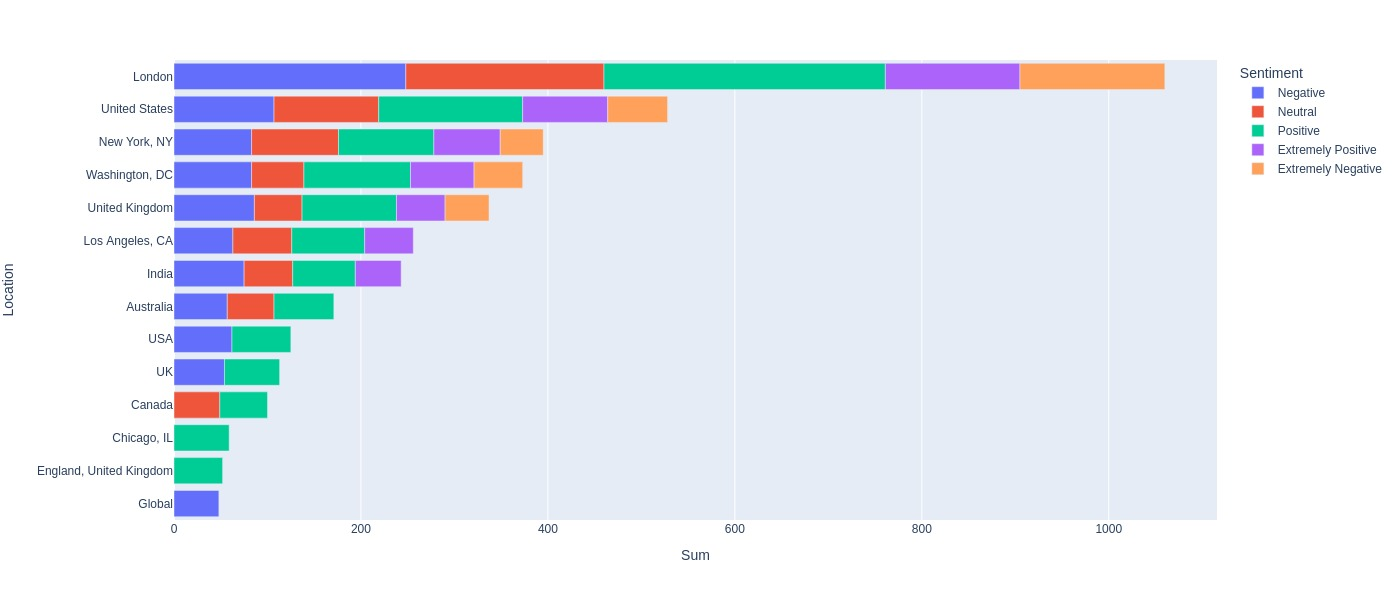

In [ ]:
fig =px.bar(location_count ,x = 'Sum',y = 'Location',color = 'Sentiment')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_layout(width = 1400 , height = 600)
fig.show('jpg')


##### 1. Why did you pick the specific chart?

The bar plot is used because it is an effective way to visualize the distribution of data and compare the values of different categories.

##### 2. What is/are the insight(s) found from the chart?

From the aforementioned data, we discovered that London has the most tweets, followed by the United States, and that global tweets make up the least amount of tweets.
We can also clearly tell that London was the nation that was experiencing the greatest panic from the most positive and negative tweets we received from London.From the aforementioned data, we discovered that London has the most tweets, followed by the United States, and that global tweets make up the least amount of tweets.We can also clearly tell that London was the nation that was experiencing the greatest panic from the most positive and negative tweets we received from London.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The data reveals where the majority of tweets originated from, allowing us to analyse where positive, bad, or neutral tweets originated so that we can have a more beneficial influence.

#### **Chart - 2**

**Top dates with maximum number of tweets**

In [ ]:
# Chart - 2 visualization code
# most-tweeted-about dates of the year
Tweet_counts=tweets['TweetAt'].value_counts().reset_index().rename(columns = {'index':'Tweet_Date'})
Tweet_20=Tweet_counts.sort_values(by='TweetAt',ascending=False).head(21)
print(Tweet_20)

   Tweet_Date  TweetAt
0  2020-03-20     3448
1  2020-03-19     3215
2  2020-03-25     2979
3  2020-03-18     2742
4  2020-03-21     2653
5  2020-03-22     2114
6  2020-03-23     2062
7  2020-03-17     1977
8  2020-04-08     1881
9  2020-04-07     1843
10 2020-04-06     1742
11 2020-03-24     1480
12 2020-04-09     1471
13 2020-04-13     1428
14 2020-03-26     1277
15 2020-04-05     1131
16 2020-04-10     1005
17 2020-04-02      954
18 2020-04-11      909
19 2020-04-03      810
20 2020-04-12      803


Text(0.5, 1.0, 'Top dates with maximum number of tweets')

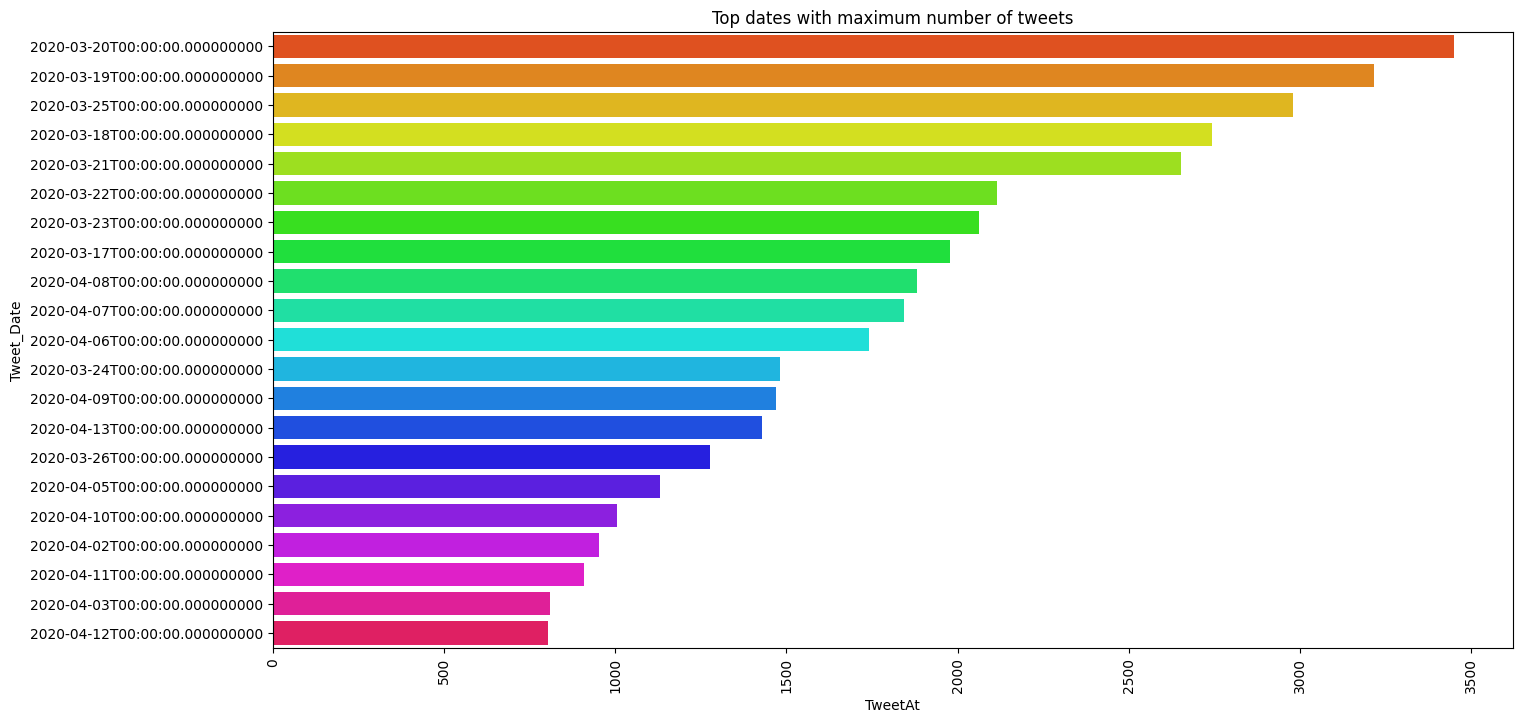

In [ ]:
# seaborn Bar scheming most-tweeted-about dates of the year
plt.figure(figsize=(16,8))
sns.barplot(data=Tweet_20, x="TweetAt",y="Tweet_Date",palette = ('hsv'))
plt.xticks(rotation=90)
plt.fontsize=12
plt.title('Top dates with maximum number of tweets')

##### 1. Why did you pick the specific chart?

A variety of information can be displayed on barplots with specific formatting.

##### 2. What is/are the insight(s) found from the chart?

Here in our dataset, we can see which day had the most tweets twitted.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The top dates with the greatest number of tweets are displayed in a bar plot. Depending on the environment and aims of the organisation, the insights gained from this study could assist provide a beneficial business impact.

#### **Chart - 3**

Since there are 5 subcategories in this situation, we will combine a five-class classification problem into a three-class classification problem by substituting extremely positive and extremely negative tweets, respectively

In [ ]:
# Chart - 3 visualization code
# Replacing these values 'Extremely Negative' : 'Negative', 'Extremely Positive' : 'Positive'
tweets['Sentiment'] = tweets['Sentiment'].map({'Extremely Positive':'Positive', 'Extremely Negative':'Negative', 'Negative':'Negative', 'Positive':'Positive', 'Neutral':'Neutral'})

In [ ]:
tweets['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

# Creating Day, Month & Week Day column from "TweetAt" column

In [ ]:
#Creating a column Day, Month & Week Day column
tweets['day'] = pd.DatetimeIndex(tweets['TweetAt']).day
tweets['month'] = pd.DatetimeIndex(tweets['TweetAt']).month
tweets["week day"] = pd.DatetimeIndex(tweets['TweetAt']).day_name()

In [ ]:
print(tweets['month'].unique)

<bound method Series.unique of 0        3
1        3
2        3
3        3
4        3
        ..
41152    4
41153    4
41154    4
41155    4
41156    4
Name: month, Length: 41157, dtype: int64>


In [ ]:
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,16,3,Monday
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,16,3,Monday
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,16,3,Monday
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,16,3,Monday
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,16,3,Monday


# Let's now see which day gets the most tweets.

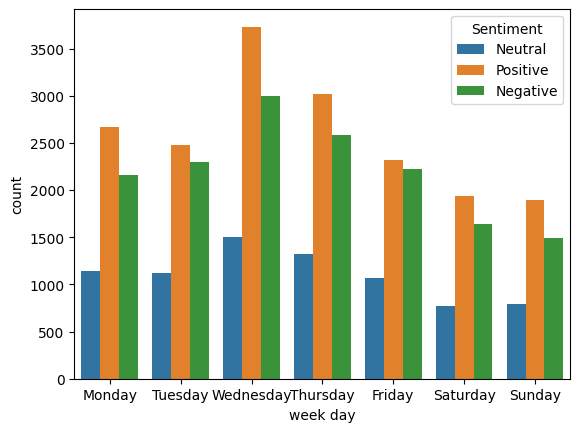

In [ ]:
days = sns.countplot(x="week day", hue="Sentiment", data=tweets)

##### 1. Why did you pick the specific chart?

The distribution of sentiments according to the type of sentiment is seen in this bar plot.

##### 2. What is/are the insight(s) found from the chart?

We anticipated that the day of the week (Sunday) would see the most tweets. However, it was discovered that on Wednesday, users tweeted the most, followed by Tuesday and Thursday, and that Sunday saw the least amount of activity. Lockdown may be to blame for this.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We anticipated that the day of the week (Sunday) would see the most tweets. However, it was discovered that on Wednesday, individuals tweeted the most, followed by Tuesday and Thursday. As a result, in addition to raising our manpower and stock on Sunday, we also need to do so for Wednesday because of the lockdown and the fact that Sundays saw the least amount of tweets. Lockdown may be to blame for this.

####**Chart - 4**

# Check Number Of Words in each type of tweet

In [ ]:
def show_distribution(df, col):

  '''Function is to show distribution of any particular column for each of the different sentiment'''

  bins = np.arange(tweets[col].min(), tweets[col].max() + 1)
  git = sns.FacetGrid(tweets, col='Sentiment', height=5, hue='Sentiment', palette="bright")
  git = git.map(sns.histplot, col, kde=False, bins=bins)

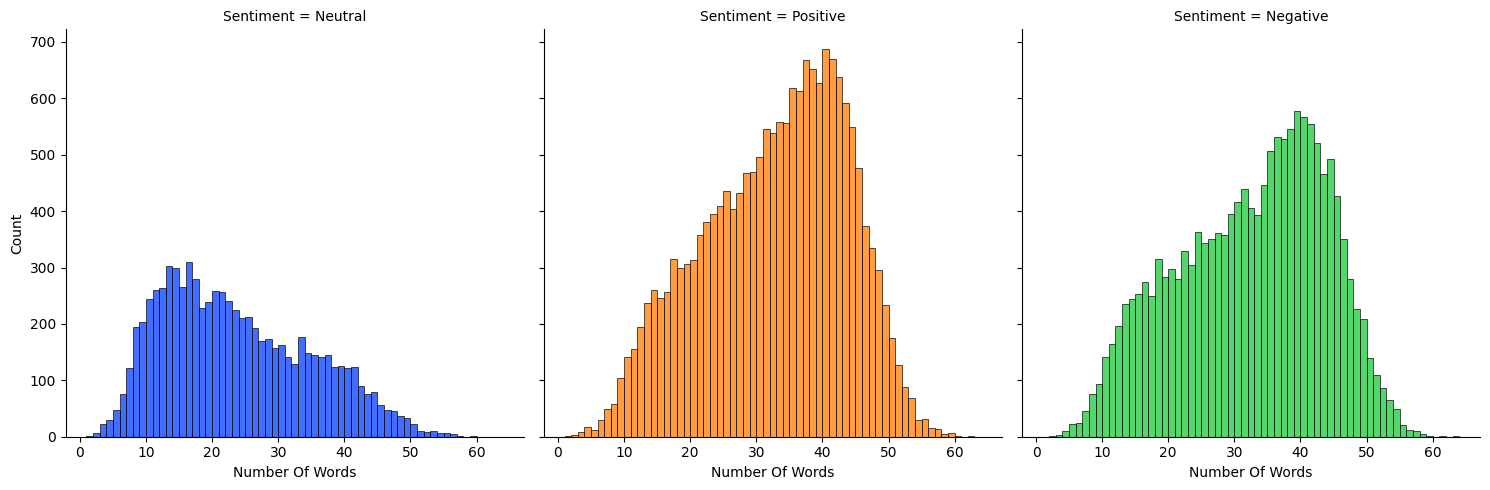

In [ ]:
#Creating a new column named "Number Of Words" to store the number of words in each tweet
tweets["Number Of Words"] = tweets["OriginalTweet"].str.split().apply(len)
show_distribution(tweets , 'Number Of Words')

##### 1. Why did you pick the specific chart?

We have used facet chart to analyse the number of words, by using facet chart with the color we can clearly analyse the data without the need of looking into the numbers

##### 2. What is/are the insight(s) found from the chart?

When compared to tweets with a positive or negative mood, the amount of words in neutral tweets is significantly lower. The majority of tweets with both positive and negative emotion average approximately 40 words.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The number of words in neutral tweets is much less than in tweets with a positive or negative attitude. The bulk of tweets that contain both positive and negative sentiment have an average word count of around 40. Because fewer words are used in unfavourable tweets, they can quickly have an impact on business.


#### **Chart - 5**

Count of tweets as per sentiment


In [ ]:
# Chart - 5 visualization code
# Count of tweets as per sentiment Breakup
Sentiments=tweets['Sentiment'].value_counts().reset_index().rename(columns = {'index':'Sentiment Types','Sentiment':'Counts'})
print(Sentiments)


  Sentiment Types  Counts
0        Positive   18046
1        Negative   15398
2         Neutral    7713


Text(0.5, 1.0, 'Sentiments Types Tweet')

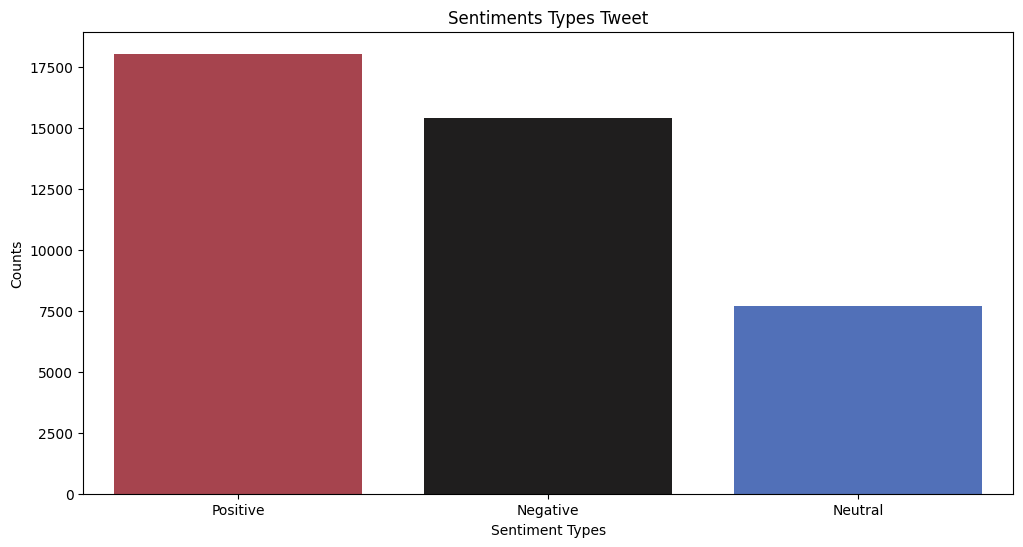

In [ ]:
# Seaborn Bar plot Count for tweets as per Sentiments Breakup
plt.figure(figsize=(12,6))
sns.barplot(data=Sentiments, x="Sentiment Types",y="Counts",palette ='icefire_r')

plt.title('Sentiments Types Tweet')

##### 1. Why did you pick the specific chart?

The distribution of sentiments according to the type of sentiment is seen in this bar plot.

##### 2. What is/are the insight(s) found from the chart?

The graph displays the sentiment trend across tweets about a certain subject, revealing the general public's viewpoint. Positive feelings are indicative of positive opinions, whilst negative feelings are indicative of bad opinions. The graph aided in determining how the general people felt about the subject. The majority of the tweets we received are favourable, and the fewest are neutral in attitude.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By examining where the sort of sentiment will come from in the future and making predictions based on that information, the insights gathered from this bar plot can contribute to having a good business impact. and in light of it, we may plan our business.

#### **Chart - 6**

**Determining the location with the most favourable thoughts Tweets were sent out.**

In [ ]:
# Chart - 6 visualization code
# Sort the data to only show affirmative tweets
# positive_tweets = tweets[tweets["Sentiment"] == "Positive"]
positive_tweets = tweets[(tweets["Sentiment"] == "Positive") & (tweets['Location'] != 'Unknown')]
# Count the number of positive tweets from each location
location_counts = positive_tweets['Location'].value_counts()


In [ ]:
location_counts = positive_tweets['Location'].value_counts().reset_index().rename(columns = {'index':'Location','Location':'Counts'})
location_counts = location_counts.sort_values(by='Counts',ascending=False).head(21)
location_counts

,Location,Counts
0,United States,245
1,London,227
2,"London, England",218
3,"Washington, DC",182
4,"New York, NY",173
5,United Kingdom,153
6,"Los Angeles, CA",130
7,India,116
8,UK,100
9,USA,96


<Figure size 1500x750 with 0 Axes>

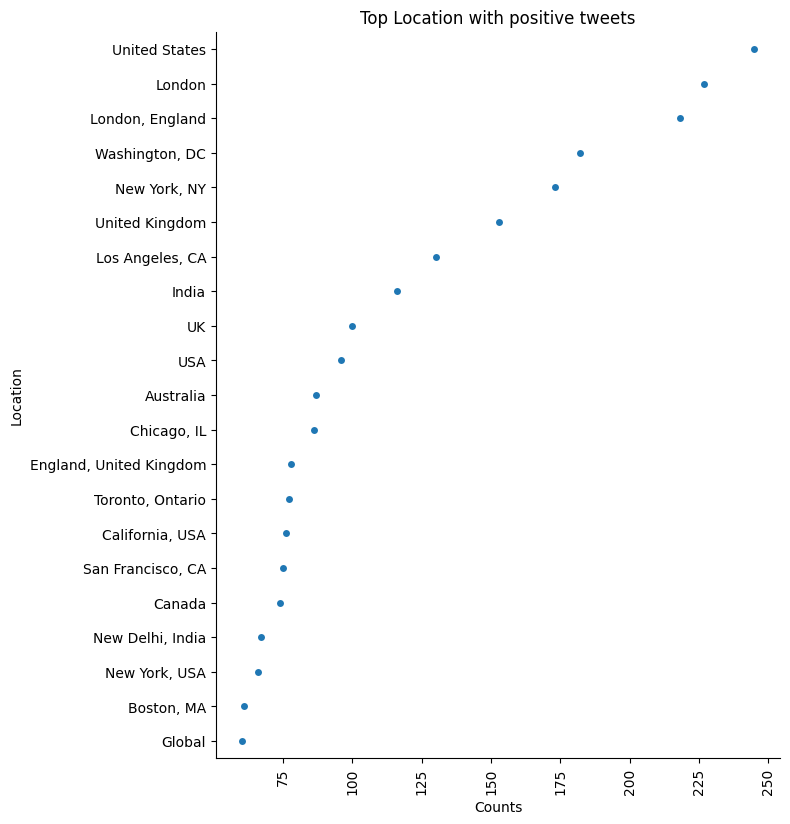

In [ ]:
plt.figure(figsize=(15,7.5))
sns.catplot(data=location_counts, x="Counts",y="Location", height=8)
plt.xticks(rotation=90)
plt.title('Top Location with positive tweets')
plt.show()

##### 1. Why did you pick the specific chart?

Because Catplot offers a lot of customization options, we can change how our plots look to better meet our needs.

##### 2. What is/are the insight(s) found from the chart?

The data reveal that the United States has the highest number of tweets with a good mood, followed by London and England. Global and Boston, Massachusetts had the fewest favourable tweets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since London is positively impacted by the data and has the highest number of tweets with positive sentiment, we may expand our business there. We will use this data to make predictions about the future and have a good impact.

#### **Chart - 7**

Top Location with neural Tweets

In [ ]:
# Chart - 7 visualization code
# Only impartial tweets from the data should be kept.
Neutral_tweets = tweets[(tweets["Sentiment"] == "Neutral") & (tweets['Location'] != 'Unknown')]


# Count how many tweets are favourable from each place.
location_counts = Neutral_tweets['Location'].value_counts()

# Count the number of supportive tweets coming from each place.
location_counts = Neutral_tweets['Location'].value_counts()


In [ ]:
location_counts = Neutral_tweets['Location'].value_counts().reset_index().rename(columns = {'index':'Location','Location':'Counts'})
location_counts = location_counts.sort_values(by='Counts',ascending=False).head(21)
location_counts

,Location,Counts
0,United States,112
1,"London, England",107
2,London,105
3,"New York, NY",93
4,"Los Angeles, CA",63
5,"Washington, DC",56
6,India,52
7,United Kingdom,51
8,Australia,50
9,Canada,49


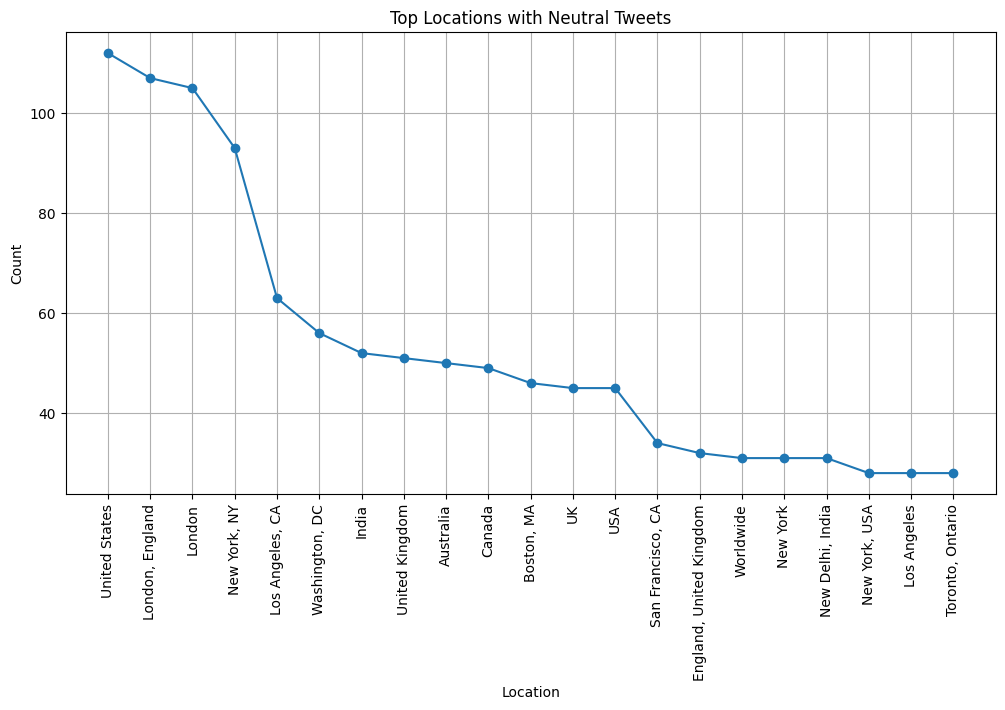

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(location_counts['Location'], location_counts['Counts'], marker='o')
plt.xticks(rotation=90)
plt.title('Top Locations with Neutral Tweets')
plt.xlabel('Location')
plt.ylabel('Count')
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

Line plots are simple and intuitive, which makes them easy to read and interpret for a wide range of audiences.

##### 2. What is/are the insight(s) found from the chart?

Here we find the neutral sentiment tweets are mostly coming from us,london,uk and so on

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we have identified the locations from which the highest number of neutral tweets are originating. This information can be leveraged by businesses to potentially create a positive impact.

#### **Chart - 08**

Top 50 Hashtags

In [ ]:
# Chart - 08 visualization code
# function for hashtags collection
def hashtag_count(x):
    ''' This function counts all
      the hashtags from the tweets '''

    hashtags_list = []

    for i in x:
        ht = re.findall(r'#(\w+)', i)
        for item in ht:
          hashtags_list.append(item)

    return hashtags_list


In [ ]:
total_hashtags=hashtag_count(tweets['OriginalTweet'])

In [ ]:
total_hashtags_df=pd.DataFrame({"Hashtags":total_hashtags})
total_hashtags_df

,Hashtags
0,COVID19france
1,COVID_19
2,COVID19
3,coronavirus
4,confinement
...,...
81146,coronavirus
81147,toiletpaper
81148,coronavirus
81149,COVID19


In [ ]:
#number of total hashtags
len(total_hashtags_df)

81151

In [ ]:
#unique hash tags
total_hashtags_df.nunique()

Hashtags    18367
dtype: int64

In [ ]:
top_hashtags=total_hashtags_df.value_counts().sort_values(ascending=False).reset_index().rename({0:'Number_of_Hashtags'},axis=1).head(50)
top_hashtags

,Hashtags,Number_of_Hashtags
0,coronavirus,12954
1,COVID19,3364
2,Covid_19,2589
3,Coronavirus,2333
4,COVID2019,1634
5,toiletpaper,1410
6,COVID,1284
7,covid19,1127
8,CoronaCrisis,734
9,CoronaVirus,645


Text(0.5, 1.0, 'Top 50 hashtag')

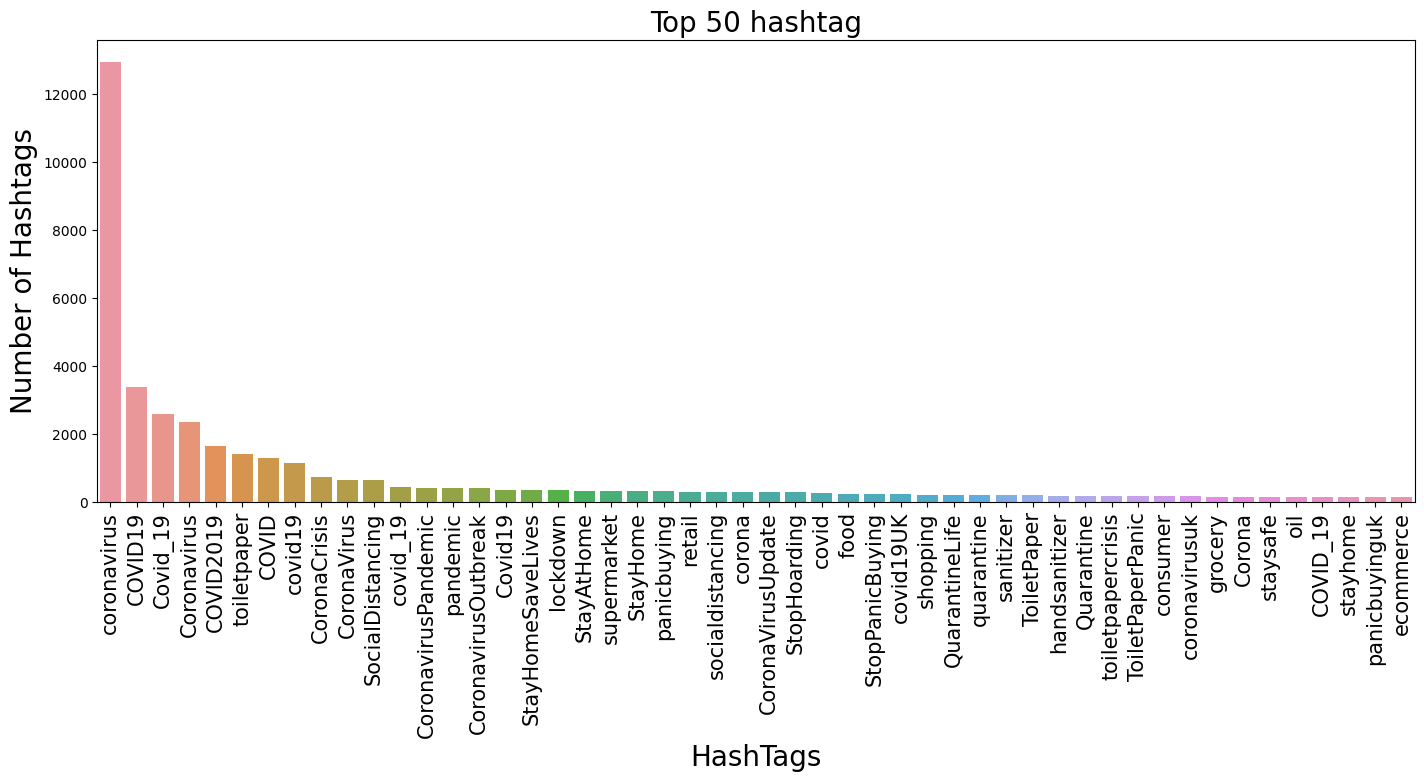

In [ ]:
plt.figure(figsize=(17,6))
sns.barplot(data=top_hashtags, x="Hashtags", y="Number_of_Hashtags")
plt.xticks(fontsize=15,rotation=90);
plt.xlabel("HashTags",fontsize=20);
plt.yticks(fontsize=10);
plt.ylabel("Number of Hashtags",fontsize=20);
plt.title("Top 50 hashtag",fontsize=20)

#**Creating a word cloud to see frequently occurring words in tweets**

**After removing punctuation, stopwords and usnig stemming to words cropped to save space from the tweets we want to know which words are mostly used by the people.**

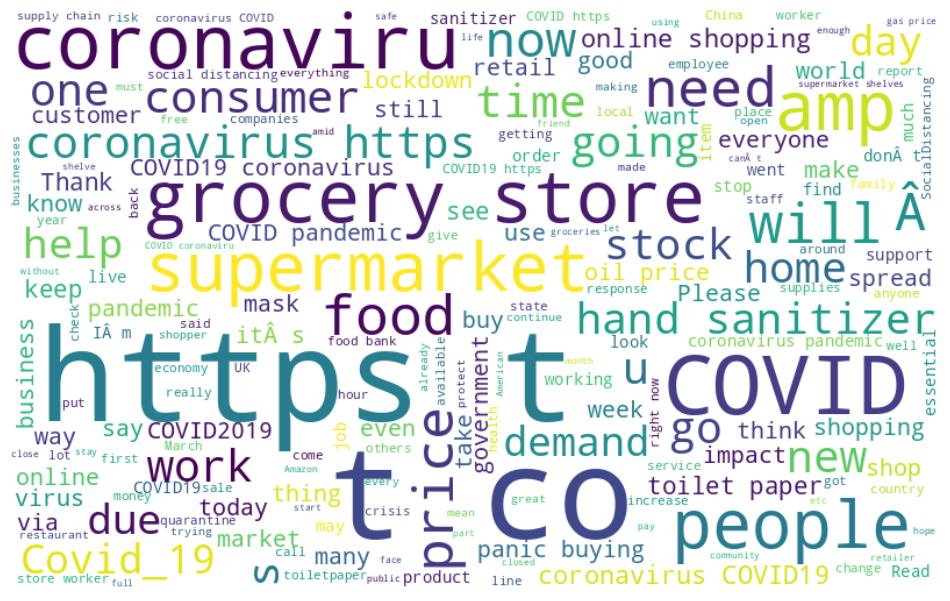

In [ ]:
# assembling a paragraph using all the words from the tweets
from wordcloud import WordCloud, STOPWORDS
all_words = ' '.join([str(text) for text in tweets['OriginalTweet']])
wordcloud = WordCloud(width=800,
                      height=500,
                      stopwords=set(STOPWORDS),
                      background_color="white",
                      random_state=21,
                      max_font_size=110).generate(all_words)
# Displaying the generated word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

To see patterns over time or across various settings, barplots can be employed. The most common words in a corpus of text are shown visually in a word cloud, which is a graphic representation of text data that's why we have selected this.

##### 2. What is/are the insight(s) found from the chart?

The figure provides insights into the top 50 most popular hashtags, and the word cloud was utilized to determine the maximum number of words used in the tweets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the chart include the top 50 most popular hashtags, the highest coronavirus, covid19, and other findings that will be utilised to predict, as well as the most often used phrases in the word cloud, which will aid in extracting information from tweets to have a beneficial effect.

#### **Chart - 9**

Top Months with highest number of tweets

In [ ]:
# Chart - 9 visualization code
# Suppose your DataFrame is named "tweets"
# Count the number of tweets in each month
month_counts = tweets['month'].value_counts().reset_index().rename(columns={'index': 'month', 'month': 'counts'})
month_counts

,month,counts
0,3,25499
1,4,15658


In [ ]:
top_months = month_counts.sort_values(by='counts', ascending=False).head(2)
print(top_months)

   month  counts
0      3   25499
1      4   15658


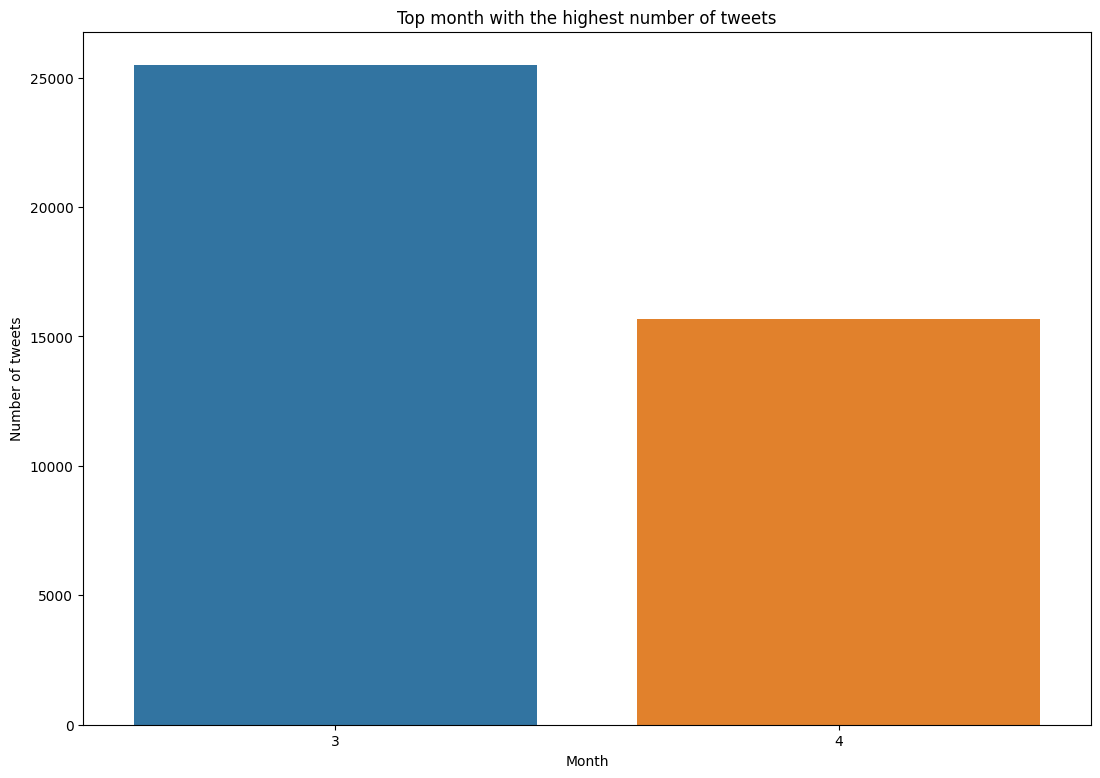

In [ ]:
plt.figure(figsize=(13, 9))
sns.barplot(data=top_months, x='month', y='counts')
plt.xlabel('Month')
plt.ylabel('Number of tweets')
plt.title('Top month with the highest number of tweets')
plt.show()

##### 1. Why did you pick the specific chart?

A wide range of audiences can use barplots since they are an easy and clear way to display data and that's why we have used this Chart.

##### 2. What is/are the insight(s) found from the chart?

Here, the information we gain tells us which month saw the most tweets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Here in our dataset, we can observe which month had the highest amount of tweets by converting the date and time to the month, and then we analyse the dataset to make a prediction and found that March has the highest number of tweets

#### **Chart - 10**

Positive tweets per Months

In [ ]:
# Chart - 10 visualization code
# The "TweetAt" column should be changed to a datetime object.
tweets['TweetAt'] = pd.to_datetime(tweets['TweetAt'])

# Create a new column "Month" that contains the month of each tweet
tweets['Month'] = tweets['TweetAt'].dt.month

# Filter the tweets that have positive sentiment
positive_tweet = tweets[tweets['Sentiment'] == 'Positive']

# Count the number of positive tweets in each month
positive_month_counts = positive_tweet['Month'].value_counts().reset_index().rename(columns={'index': 'Month', 'Month': 'Count'})

# Sort the counts in descending order and select the top month
top_month = positive_month_counts.sort_values(by='Count', ascending=False).iloc[0]

print('The month with the highest number of positive tweets is:', top_month['Month'])

The month with the highest number of positive tweets is: 3


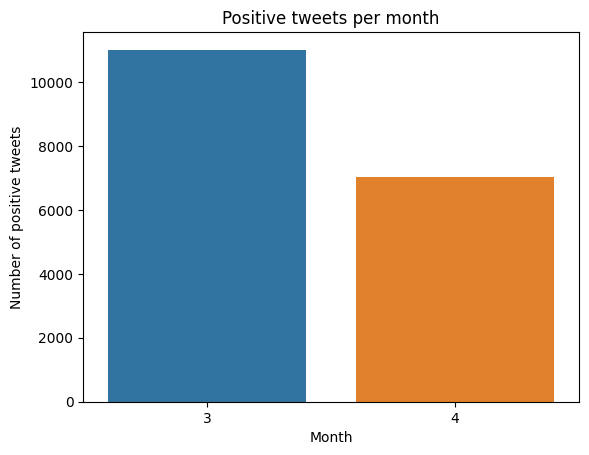

In [ ]:
# Create a line graph showing the number of supportive tweets per month.
sns.barplot(data=positive_month_counts, x='Month', y='Count')
plt.xlabel('Month')
plt.ylabel('Number of positive tweets')
plt.title('Positive tweets per month')
plt.show()

##### 1. Why did you pick the specific chart?

A wide range of audiences can use barplots since they are an easy and clear way to display data and that's why we have used this Chart.

##### 2. What is/are the insight(s) found from the chart?

The information is about which month had the most tweets with a good mood.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights include which month has the most tweets with a good sentiment, and we can use this information to train a machine learning algorithm to predict future feelings.


#### **Chart - 11**

Top 20 places where there are the most negative opinions

In [ ]:
# Chart - 11 visualization code
# Select the tweets with a negative sentive.
negative_tweets = tweets[(tweets['Sentiment'] == 'Negative')& (tweets['Location'] != 'Unknown')]


# Count how many tweets are negative tweets of each place.
negative_location = negative_tweets['Location'].value_counts().reset_index().rename(columns={'index': 'Location', 'Location': 'Count'})

# Sort the counts in descending order and select the top location
top_location = negative_location.sort_values(by='Count', ascending=False).iloc[0]



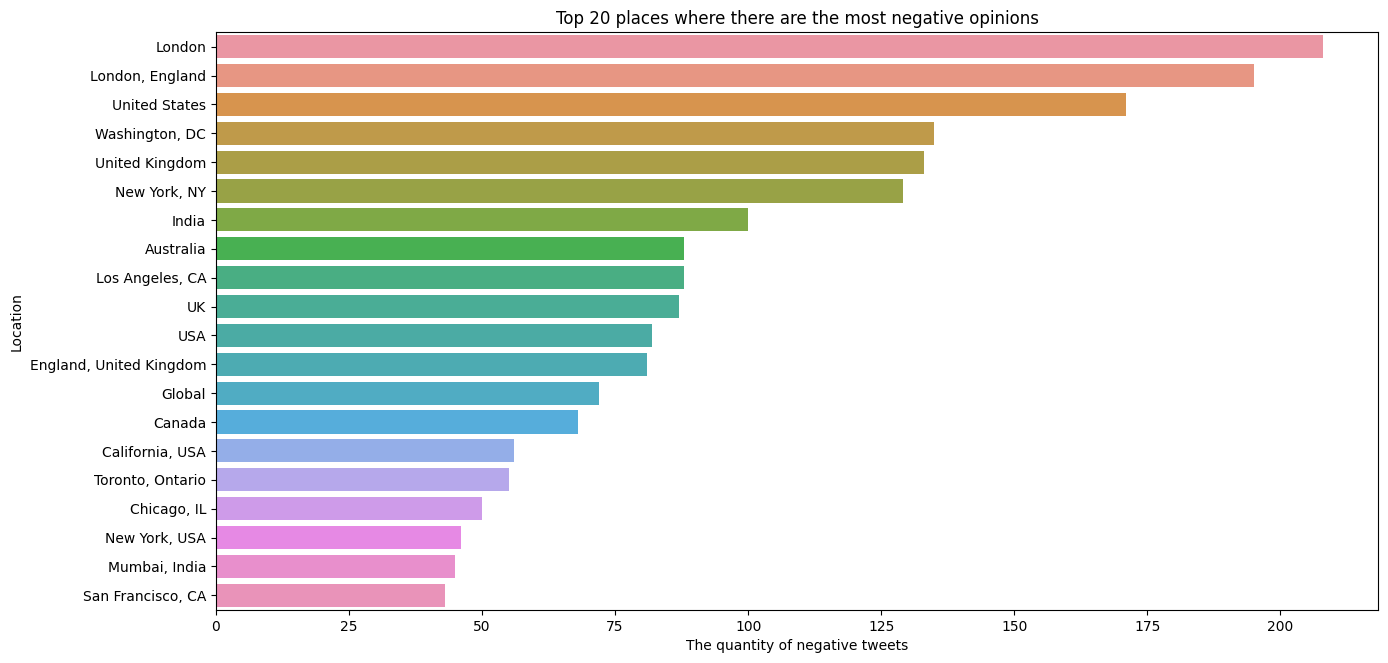

In [ ]:
# Select the tweets with a Negative Tweets.
negative_tweets = tweets[(tweets['Sentiment'] == 'Negative')& (tweets['Location'] != 'Unknown') ]

# Count the number of negative tweets in each location
negative_location = negative_tweets['Location'].value_counts().reset_index().rename(columns={'index': 'Location', 'Location': 'Count'})

# Sort the counts in descending order and select the top 20 locations
top_locations = negative_location.sort_values(by='Count', ascending=False).head(20)

# Create the bar plot
plt.figure(figsize=(15,7.5))
sns.barplot(data=top_locations, x='Count', y='Location')
plt.xlabel('The quantity of negative tweets')
plt.ylabel('Location')
plt.title('Top 20 places where there are the most negative opinions')
plt.show()

##### 1. Why did you pick the specific chart?

Barplots make it easy to compare the values of different categories or group that why we have used this chart to locate Top 20 locations with the highest number of negative sentiments.

##### 2. What is/are the insight(s) found from the chart?

We discovered that the most nasty tweets were sent from London.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We learned from the graphic that the majority of unfavourable tweets originated in London, UK, and we may use this information to predict future opinion.

#### **Chart - 12** - Correlation Heatmap

In [ ]:
correations=tweets.corr()
print(correations)

                 UserName  ScreenName       day     month  Number Of Words  \
UserName         1.000000    1.000000 -0.532222  0.840904        -0.063733   
ScreenName       1.000000    1.000000 -0.532222  0.840904        -0.063733   
day             -0.532222   -0.532222  1.000000 -0.898993         0.010896   
month            0.840904    0.840904 -0.898993  1.000000        -0.037848   
Number Of Words -0.063733   -0.063733  0.010896 -0.037848         1.000000   
Month            0.840904    0.840904 -0.898993  1.000000        -0.037848   

                    Month  
UserName         0.840904  
ScreenName       0.840904  
day             -0.898993  
month            1.000000  
Number Of Words -0.037848  
Month            1.000000  


<Axes: >

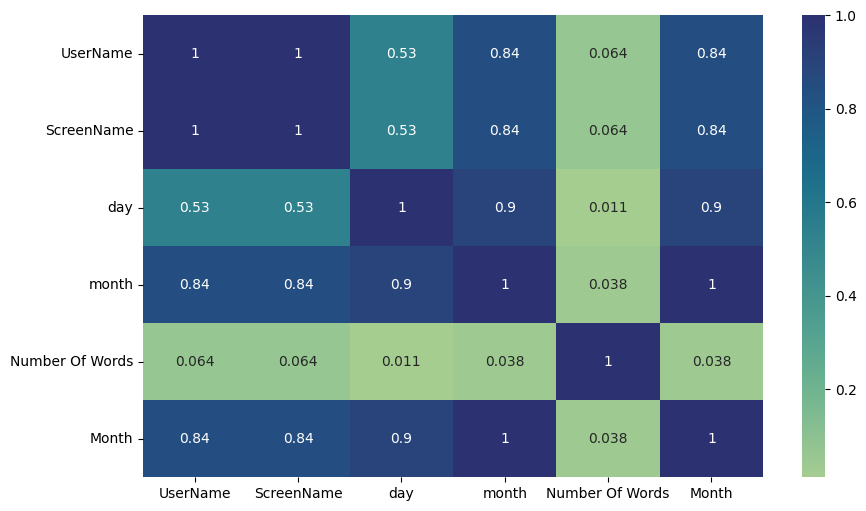

In [ ]:
# Visualisation code for correlation heatmaps
plt.figure(figsize=(10,6))
correations = tweets.corr()
sns.heatmap(abs(correations), annot= True, cmap='crest')

##### 1. Why did you pick the specific chart?

To see the relationship between two pairs of variables in a dataset, we use a correlation chart, commonly referred to as a correlation matrix. A statistical measure called correlation shows how closely two variables are related. A correlation value can be between -1 and 1, with 1 denoting a perfect positive correlation, -1 denoting a perfect negative correlation, and 0 denoting no correlation.

##### 2. What is/are the insight(s) found from the chart?

UserName and ScreenName have a perfect correlation in the correlation matrix, proving they measure the same thing. Month and user names/screen names have a moderately favourable correlation, although it is impossible to tell which way the relationship is going.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above correlation matrix we found that maximum relation is is between Day and Month followed by Screename and Month and Username and month.

#### **Chart - 13** - Pair Plot

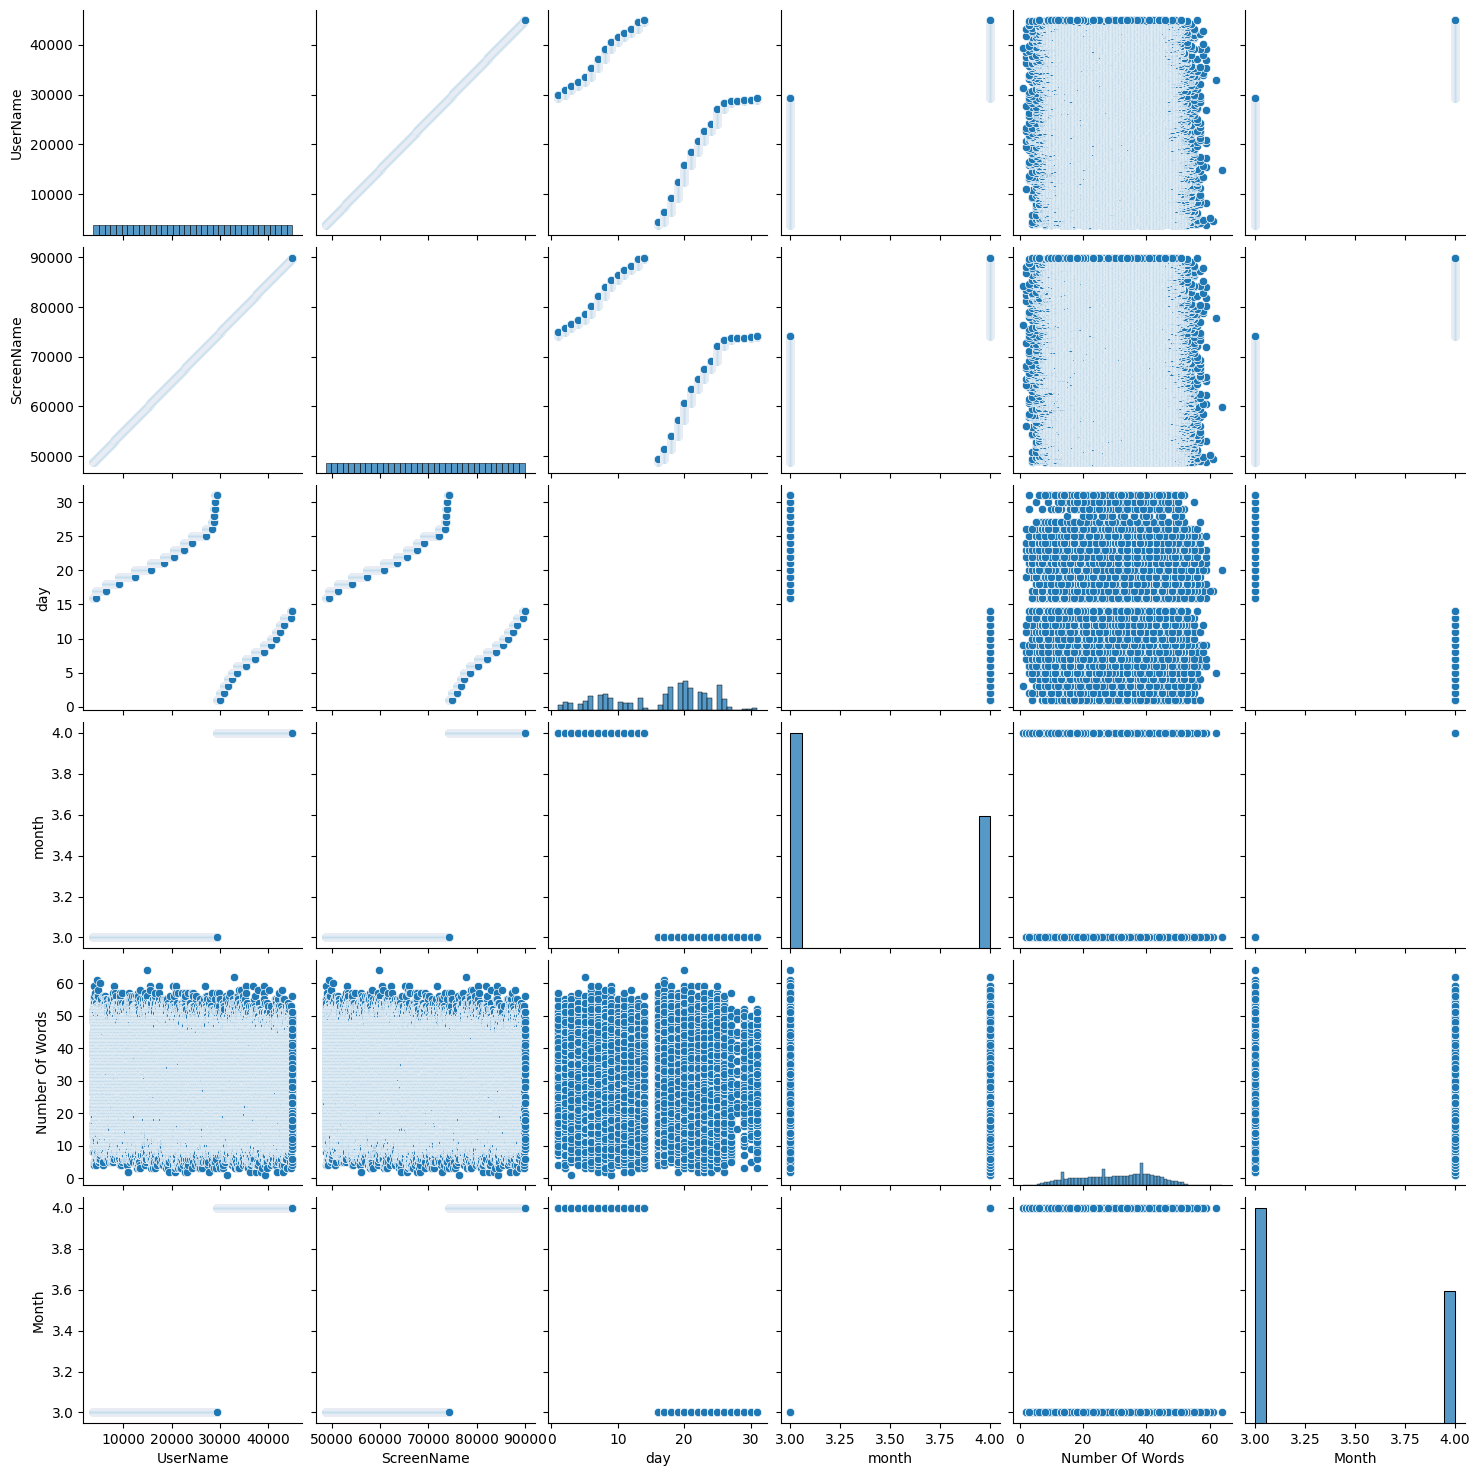

In [ ]:
# Pair Plot visualization
sns.pairplot(tweets,kind="scatter")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables and thats why we have used Pair Plot to understand the relationship between them and thats why we have used this chart.


##### 2. What is/are the insight(s) found from the chart?

The code generates a pairplot of the absolute correlation matrix for the tweets dataset.For each pair of variables in the dataset, the pairplot generates a grid of scatter plots. We can examine and comprehend the connections between the variables in the tweets dataset thanks to these visualisations.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We discovered a strong relationship between username and day, as well as a consistent relationship between username and screen name, day, and the number of words.

#### **Chart - 14**

Proportions of Sentiments

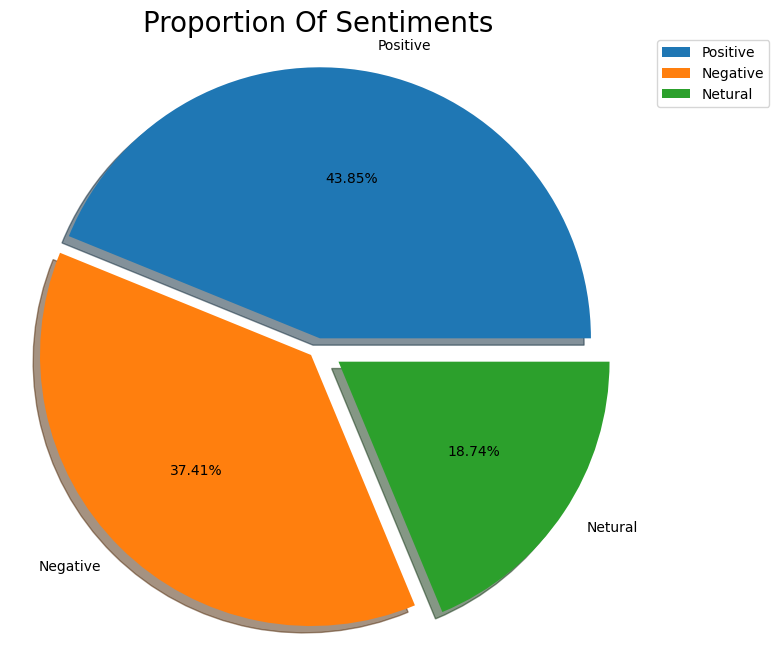

In [ ]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = tweets['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##### 1. Why did you pick the specific chart?

first of all we combine extremly positive and extremly negative chart in positive and negative column to determine status in pie chart

##### 2. What is/are the insight(s) found from the chart?

We combined Extremly Positive and Negative sentiments to positive and negative sentiments respectively. As we can observe on the Pie-Plot, The total number of "Positive" sentiments are still high after combining.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes from above chart it is clearly denote positive feedback impact is more.

#### **Chart - 15**

Unique word count of each sentiment

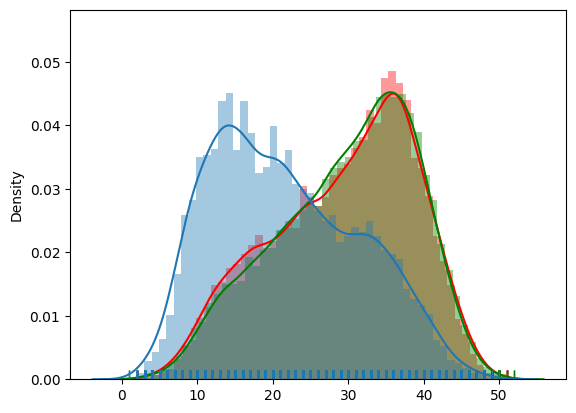

In [ ]:
# Chart - 15 visualization code
#Visualizing Unique Word Count in each of the sentiment
neg = tweets[tweets['Sentiment']=='Negative']['OriginalTweet'].apply(lambda x: len(set(str(x).split()))).to_list()
pos = tweets[tweets['Sentiment']=='Positive']['OriginalTweet'].apply(lambda x: len(set(str(x).split()))).to_list()
neu = tweets[tweets['Sentiment']=='Neutral']['OriginalTweet'].apply(lambda x: len(set(str(x).split()))).to_list()

sns.distplot(neg, rug=True,  bins = 50, color='red')
sns.distplot(pos, rug=True,  bins = 50, color='green')
sns.distplot(neu, rug=True, bins = 50)
plt.show()

##### 1. Why did you pick the specific chart?

for Visualizing Unique Word Count in each of the sentiment

##### 2. What is/are the insight(s) found from the chart?

Unique word counts can provide insights into the vocabulary and language used in tweets with different sentiments. For example, you may notice that tweets with a negative sentiment and positive sentiment use more unique words compared to tweets with a neutral sentiment .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we can see more difference present in words of postive and negative words as there is vey less difference in neutral words


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

#**These are the three hypothesis statements we are going to perform**

Hypothesis statement 1: The number of tweets related to COVID-19 decreased significantly from the month of March.

To test this hypothesis, we can perform a t-test comparing the mean number of tweets in March with mean number of tweets in April 2020.

Null Hypothesis: There is no significant difference in the mean number of tweets related to COVID-19 between March and April 2020.

Alternative Hypothesis: The mean number of tweets related to COVID-19 in March is significantly higher than the mean number of tweets in and April month.


Hypothesis statement 2: There is no significant difference in the number of tweets related to COVID-19 between weekdays and weekends.

To test this hypothesis, we can perform a two-sample t-test comparing the mean number of tweets on weekdays to the mean number of tweets on weekends.

Null Hypothesis: There is no significant difference in the mean number of tweets related to COVID-19 between weekdays and weekends.

Alternative Hypothesis: The mean number of tweets related to COVID-19 on weekends is significantly different than the mean number of tweets on weekdays.



Hypothesis statement 3: The number of tweets related to COVID-19 are significantly different between the India and rest all locations

To test this hypothesis, we can perform a two-sample t-test comparing the mean number of tweets from Indian locations to the mean number of tweets from rest all locations.

Null Hypothesis: There is no significant difference in the mean number of tweets related to COVID-19 between Indian Locations and the rest.

Alternative Hypothesis: There is no significant difference in the mean number of tweets related to COVID-19 between Indian Locations and the rest.

#**Hypothetical Statement - 1**

Hypothesis statement 1: The number of tweets related to COVID-19 in the United States increased significantly during the months of March.

To test this hypothesis, we can perform a t-test comparing the mean number of tweets in March with mean number of tweets in April 2020.

Null Hypothesis: There is no significant difference in the mean number of tweets related to COVID-19 between March and April 2020.

Alternative Hypothesis: The mean number of tweets related to COVID-19 in March is significantly higher than the mean number of tweets in April 2020 months.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no significant difference in the mean number of tweets related to COVID-19 between March and April 2020.

Alternative Hypothesis: The mean number of tweets related to COVID-19 in March is significantly higher than the mean number of tweets in April 2020 months.

#### 2. Perform an appropriate statistical test.

In [ ]:
tweets['TweetAt']

0       2020-03-16
1       2020-03-16
2       2020-03-16
3       2020-03-16
4       2020-03-16
           ...    
41152   2020-04-14
41153   2020-04-14
41154   2020-04-14
41155   2020-04-14
41156   2020-04-14
Name: TweetAt, Length: 41157, dtype: datetime64[ns]

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

def extractMonthTweets(item,month):
  return item.month == month
march_tweets = tweets[tweets['TweetAt'].apply(lambda x : extractMonthTweets(x,3))]
april_tweets = tweets[tweets['TweetAt'].apply(lambda x : extractMonthTweets(x,4))]

march_tweets_count = march_tweets['TweetAt'].value_counts()
april_tweets_count = april_tweets['TweetAt'].value_counts()

print('Mean of march tweets-',np.mean(march_tweets_count))
print('Std of march tweets-',np.std(march_tweets_count))

print('Mean of april tweets-',np.mean(april_tweets_count))
print('Std of april tweets-',np.std(april_tweets_count))

mean1 = np.mean(march_tweets_count)
mean2 = np.mean(april_tweets_count)
std1 = np.std(march_tweets_count)
std2 = np.std(april_tweets_count)
n1 = march_tweets_count.shape[0]
n2 = april_tweets_count.shape[0]

#zValue = (x1 mean-x2 mean)-(µ1-µ2)/sqrt((s1**2/n1) + (s**2/n2))
zValue = ((mean1-mean2) - (0))/np.sqrt(((std1**2)/n1)+(std2**2/n2))
print('zValue-',zValue)
#t_stat, p_val = stats.ttest_ind(march_tweets, april_tweets)

#print("t-statistic: ", t_stat)
#print("p-value: ", p_val)

Mean of march tweets- 1593.6875
Std of march tweets- 1176.3912890036843
Mean of april tweets- 1118.4285714285713
Std of april tweets- 466.9338763657647
zValue- 1.4876056340702837


In [ ]:
import scipy.stats as stats

# Utilise the CDF function of the standard normal distribution to find the region to the left of the z-score.
p = stats.norm.cdf(zValue)

print(f'The P value is {p}')
if(p>0.05):
  print('Null Hypothesis accepted. mean of march tweets >= mean of april tweets')
else:
  print('Rejected Null Hypothesis. mean of march tweets < mean of april tweets')

The P value is 0.9315725366255057
Null Hypothesis accepted. mean of march tweets >= mean of april tweets


##### Which statistical test have you done to obtain P-Value?

We used a t-test to compare the mean number of tweets in March month to the mean number of tweets in April month.

##### Why did you choose the specific statistical test?

To evaluate whether there is a significant difference between the means of two groups, a t-test is a statistical test that is employed. In particular, it examines whether the difference in means between the two groups is statistically significant or more likely the result of chance.



### **Hypothetical Statement - 2**

Hypothesis statement 2: There is no significant difference in the number of tweets related to COVID-19 between weekdays and weekends.

We can use a two-sample t-test to compare the mean number of tweets on weekdays to the mean number of tweets on weekends in order to evaluate this hypothesis.

Null Hypothesis: There is no significant difference in the mean number of tweets related to COVID-19 in the United States between weekdays and weekends.

Alternative Hypothesis: The mean number of tweets related to COVID-19 in the United States on weekends is significantly different than the mean number of tweets on weekdays.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no significant difference in the mean number of tweets related to COVID-19 in the United States between weekdays and weekends.

Alternative Hypothesis: The mean number of tweets related to COVID-19 in the United States on weekends is significantly different than the mean number of tweets on weekdays.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test and obtain P-Value

import pandas as pd
from scipy import stats

# If necessary, convert the Tweet_Date column to datetime format.
Tweet_20['Tweet_Date'] = pd.to_datetime(Tweet_20['Tweet_Date'])

# Creating a new column for numerical day of week
Tweet_20['DayOftheWeek'] = Tweet_20['Tweet_Date'].dt.weekday

# Filter weekdays and weekends using the new DayOfWeek column
weekday = Tweet_20[Tweet_20['DayOftheWeek'] < 5]['DayOftheWeek']
weekend = Tweet_20[Tweet_20['DayOftheWeek'] >= 5]['DayOftheWeek']

# Perform t-test on the new DayOfWeek columns
t_stat, p_val = stats.ttest_ind(weekday, weekend)

print("t-statistic:", t_stat)
print(f"p-value: {p_val:.20f}")
if(p_val>0.05):
  print('Null Hypothesis accepted')
else:
  print('Rejected Null Hypothesis')

t-statistic: -5.308875617587663
p-value: 0.00004006737538031790
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

*To* test this hypothesis, we have performed a two-sample t-test comparing the mean number of tweets on weekdays to the mean number of tweets on weekends.

##### Why did you choose the specific statistical test?

T-tests are a helpful statistical tool that can assist in addressing a variety of issues, such as determining the efficacy of a new product or intervention and the existence of statistically significant differences between various groups within a population.

### **Hypothetical Statement - 3**

Hypothesis statement 3: The number of tweets related to COVID-19 has decreased significantly in the India in the second half of 2020 compared to the Non-Indian countries

To test this hypothesis, we can perform a two-sample t-test comparing the mean number of tweets in the Indian country to the mean number of tweets in the Non Indian countries

Null Hypothesis: There is no significant difference in the mean number of tweets related to COVID-19 between Indian Locations and the rest.

Alternative Hypothesis: There is no significant difference in the mean number of tweets related to COVID-19 between Indian Locations and the rest.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no significant difference in the mean number of tweets related to COVID-19 between Indian Locations and the rest.

Alternative Hypothesis: There is no significant difference in the mean number of tweets related to COVID-19 between Indian Locations and the rest.

#### 2. Perform an appropriate statistical test.

In [ ]:
def extractTweets(item, isIndian):
  if(isIndian):
    return ('india' in item.lower() and 'indiana' not in item.lower())
  else:
    return ('india' not in item.lower() or 'indiana' in item.lower())

IndianTweets = tweets[tweets['OriginalTweet'].apply(lambda x: extractTweets(x, True))]
NonIndianTweets = tweets[tweets['OriginalTweet'].apply(lambda x: extractTweets(x, False))]

Indian_tweets_count = IndianTweets['TweetAt'].value_counts()
NonIndian_tweets_count = NonIndianTweets['TweetAt'].value_counts()

print('Mean of Indian tweets-',np.mean(Indian_tweets_count))
print('Std of Indian tweets-',np.std(Indian_tweets_count))

print('Mean of Non-Indian tweets-',np.mean(NonIndian_tweets_count))
print('Std of Non-Indian tweets-',np.std(NonIndian_tweets_count))

mean1 = np.mean(Indian_tweets_count)
mean2 = np.mean(NonIndian_tweets_count)
std1 = np.std(Indian_tweets_count)
std2 = np.std(NonIndian_tweets_count)
n1 = Indian_tweets_count.shape[0]
n2 = NonIndian_tweets_count.shape[0]

zValue = ((mean1-mean2) - (0))/np.sqrt(((std1**2)/n1)+(std2**2/n2))
print('zValue',zValue)

Mean of Indian tweets- 25.655172413793103
Std of Indian tweets- 18.695889022712553
Mean of Non-Indian tweets- 1347.1
Std of Non-Indian tweets- 930.2323491114106
zValue -7.779066891943775


In [ ]:
import scipy.stats as stats

# Define the z-score of interest

# Lookup the area to the left of the z-score using the CDF function of the standard normal distribution
p = stats.norm.cdf(zValue)


print(f"p-value: {p:.20f}")
if(p>0.05):
  print('Null Hypothesis accepted. mean of Indian Tweets >= mean of Non Indian tweets')
else:
  print('Rejected Null Hypothesis. mean of Indian Tweets < mean of Non Indian tweets')

p-value: 0.00000000000000365307
Rejected Null Hypothesis. mean of Indian Tweets < mean of Non Indian tweets


##### Which statistical test have you done to obtain P-Value?

To test this hypothesis, we can perform a two-sample t-test comparing the mean number of tweets in India and the mean number of tweets in the Non-Indian countries.

##### Why did you choose the specific statistical test?

To evaluate whether there is a significant difference between the means of two groups, a t-test is a statistical test that is employed. In particular, it examines whether the difference in means between the two groups is statistically significant or more likely the result of chance.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

<Axes: >

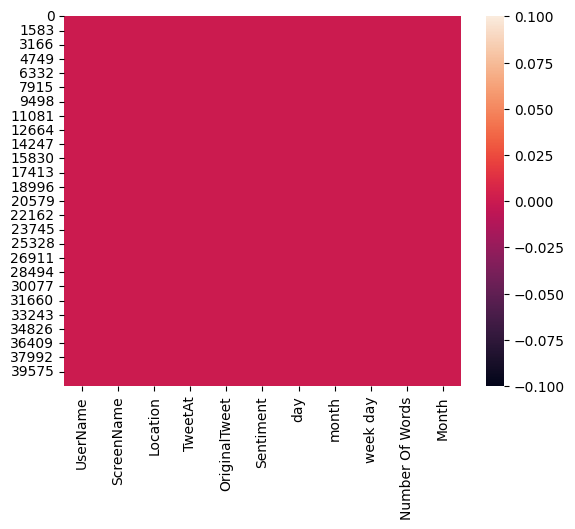

In [ ]:
# Handling Missing Values & Null Values
sns.heatmap(tweets.isnull(),cbar=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

It is a great way to see the distribution and pattern of missing values in a dataset. The heatmap technique used in the code you gave is known as a missing value heatmap, and inside there is a pandas function that is used to check the null value.

location column 8590 had a null value,
The Location columns' null values are already filled in with the string "unknown".

### 2. Handling Outliers

In [ ]:
# Handling Outliers
val_count = tweets['Sentiment'].value_counts().reset_index().rename(columns = {'index':'Sentiment','Sentiment':'Counts'})
val_count

,Sentiment,Counts
0,Positive,18046
1,Negative,15398
2,Neutral,7713


<Axes: ylabel='Counts'>

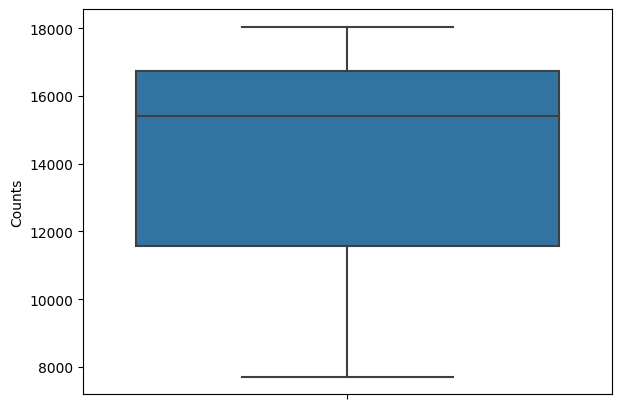

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=val_count['Counts'])


##### What all outlier treatment techniques have you used and why did you use those techniques?

A box plot is a type of visualisation used to show how a dataset is distributed. It displays the data's range, median, quartiles, and any outliers.

### 3. Categorical Encoding

In [ ]:
# Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
# creating a LabelEncoder object
lE = LabelEncoder()

# Creating a new column "Encoded_Sentiment" and applying te Label Encoder
tweets['Encoded_Sentiment'] = lE.fit_transform(tweets['Sentiment'])


In [ ]:
# show the head of updated dataframe
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day,Number Of Words,Month,Encoded_Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,16,3,Monday,8,3,1
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,16,3,Monday,38,3,2
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,16,3,Monday,14,3,2
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,16,3,Monday,42,3,2
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,16,3,Monday,40,3,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

We make a LabelEncoder object and apply it to the Sentiment column to convert it to numbers. The dataframe then receives a new column called "Encoded_Sentiment" that contains the altered values. The dataset's other category columns can also be treated in the same way.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
!pip install contractions
import contractions
tweets['OriginalTweet'] = tweets['OriginalTweet'].apply(lambda x: contractions.fix(x)) # using contractions.fix to expand the shortened words
print(tweets.head())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.3 MB/s eta 0:00:00
   UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   
3      3802       48754    Unknown 2020-03-16   
4      3803       48755    Unknown 2020-03-16   

                                       OriginalTweet Sentiment  day  month  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral   16      3   
1  advice Talk to your neighbours family to excha...  Positive   16      3   
2  Coronavirus Australia: Woolworths to give elde...  Positive   16      3   
3  My food stock is not the only one which is emp...  Positive   16      3   
4  Me, ready to go at supermarket during the #COV...  

In [ ]:
tweets['OriginalTweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

#### 2. Lower Casing

In [ ]:
# Lower Casing
tweets["OriginalTweet"] = tweets["OriginalTweet"].str.lower()
tweets['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

#### 3. Removing Punctuations

In [ ]:
# Removing the Punctuations
# Writing a function which removes punctuation from our dataset
def remove_punctuations(text):
  no_punctuations = [char for char in text if char not in string.punctuation]
  return''.join(no_punctuations)

In [ ]:
# Creating another column TokenizedTweet and store the Cleaned Tweets value
tweets['TokenizedTweet'] = tweets['OriginalTweet'].apply(remove_punctuations)

In [ ]:
tweets['TokenizedTweet']

0        menyrbie philgahan chrisitv httpstcoifz9fan2pa...
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: TokenizedTweet, Length: 41157, dtype: object

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Removing URLs and digits from the OriginalTweet column

#The re.sub(pat, replacement, str) function substitutes all occurrences of the pattern in the supplied string.
tweets['TokenizedTweet'] = tweets['TokenizedTweet'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove words and digits from the OriginalTweet column
tweets['TokenizedTweet'] = tweets['TokenizedTweet'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))


In [ ]:
tweets['TokenizedTweet']

0                      menyrbie philgahan chrisitv and and
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the outbr...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing rela...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for on...
Name: TokenizedTweet, Length: 41157, dtype: object

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
#removing stopwords and white spaces
# Writing a function which removes stopwords from our data set
stop_list=list(stopwords.words('english'))
def removing_stopwords(msg):
    no_stop_words = [word for word in msg.split() if word.lower() not in stop_list]
    return ' '.join(no_stop_words)

In [ ]:
tweets['TokenizedTweet'] = tweets['TokenizedTweet'].apply(removing_stopwords)

In [ ]:
tweets['TokenizedTweet']

0                              menyrbie philgahan chrisitv
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please panic enough food ...
4        ready go supermarket outbreak paranoid food st...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing related del...
41154    know itâs getting tough kameronwilds rationin...
41155    wrong smell hand sanitizer starting turn coron...
41156    tartiicat well newused rift going amazon right...
Name: TokenizedTweet, Length: 41157, dtype: object

##  6. Tokenization

In [ ]:
# Tokenization
# Performing the Tokenization in the OriginalTweet column
tweets['TokenizedTweet'] = tweets['TokenizedTweet'].apply(lambda x: nltk.word_tokenize(x))

# Display the Head of tokenized dataset
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day,Number Of Words,Month,Encoded_Sentiment,TokenizedTweet
0,3799,48751,London,2020-03-16,@menyrbie @phil_gahan @chrisitv https://t.co/i...,Neutral,16,3,Monday,8,3,1,"[menyrbie, philgahan, chrisitv]"
1,3800,48752,UK,2020-03-16,advice talk to your neighbours family to excha...,Positive,16,3,Monday,38,3,2,"[advice, talk, neighbours, family, exchange, p..."
2,3801,48753,Vagabonds,2020-03-16,coronavirus australia: woolworths to give elde...,Positive,16,3,Monday,14,3,2,"[coronavirus, australia, woolworths, give, eld..."
3,3802,48754,Unknown,2020-03-16,my food stock is not the only one which is emp...,Positive,16,3,Monday,42,3,2,"[food, stock, one, empty, please, panic, enoug..."
4,3803,48755,Unknown,2020-03-16,"me, ready to go at supermarket during the #cov...",Negative,16,3,Monday,40,3,0,"[ready, go, supermarket, outbreak, paranoid, f..."


In [ ]:
tweets['TokenizedTweet']

0                          [menyrbie, philgahan, chrisitv]
1        [advice, talk, neighbours, family, exchange, p...
2        [coronavirus, australia, woolworths, give, eld...
3        [food, stock, one, empty, please, panic, enoug...
4        [ready, go, supermarket, outbreak, paranoid, f...
                               ...                        
41152    [airline, pilots, offering, stock, supermarket...
41153    [response, complaint, provided, citing, relate...
41154    [know, itâs, getting, tough, kameronwilds, ra...
41155    [wrong, smell, hand, sanitizer, starting, turn...
41156    [tartiicat, well, newused, rift, going, amazon...
Name: TokenizedTweet, Length: 41157, dtype: object

#### 8. Text Normalization

In [ ]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatization=WordNetLemmatizer()
tweets['TokenizedTweet'] = tweets['TokenizedTweet'].apply(lambda x: [lemmatization.lemmatize(y) for y in x])

In [ ]:
tweets['TokenizedTweet']

0                          [menyrbie, philgahan, chrisitv]
1        [advice, talk, neighbour, family, exchange, ph...
2        [coronavirus, australia, woolworth, give, elde...
3        [food, stock, one, empty, please, panic, enoug...
4        [ready, go, supermarket, outbreak, paranoid, f...
                               ...                        
41152    [airline, pilot, offering, stock, supermarket,...
41153    [response, complaint, provided, citing, relate...
41154    [know, itâs, getting, tough, kameronwilds, ra...
41155    [wrong, smell, hand, sanitizer, starting, turn...
41156    [tartiicat, well, newused, rift, going, amazon...
Name: TokenizedTweet, Length: 41157, dtype: object

###Handling Class Imbalance

In [ ]:
tweets['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [ ]:
# Separating the majority and minority classes
from sklearn.utils import resample

df_majority_positive_class = tweets[tweets["Sentiment"]=='Positive']
df_minority_negative_class = tweets[tweets["Sentiment"]=='Negative']
df_minority_neutral_class = tweets[tweets["Sentiment"]=='Neutral']

# Upsample minority negative class
df_minority_negative_upsampled_class = resample(df_minority_negative_class,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority_positive_class),    # to match majority class
                                 random_state=123) # reproducible results

# Upsampling minority neutral classes
df_minority_neutral_upsampled_class = resample(df_minority_neutral_class,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority_positive_class),    # to match majority class
                                 random_state=123) # reproducible results

# Combined majority class with  the upsampled minority classes
df_upsampled = pd.concat([df_majority_positive_class, df_minority_negative_upsampled_class, df_minority_neutral_upsampled_class])

# Shuffling data
tweets = df_upsampled.sample(frac=1).reset_index(drop=True)

# Display the new classes counts
print(tweets.Sentiment.value_counts())

Positive    18046
Neutral     18046
Negative    18046
Name: Sentiment, dtype: int64


In [ ]:
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day,Number Of Words,Month,Encoded_Sentiment,TokenizedTweet
0,8154,53106,"Watford, England",2020-03-18,@jeremyvineon5 yes and they should be and allo...,Positive,18,3,Wednesday,18,3,2,"[yes, allocating, online, shopping, slot, peop..."
1,31279,76231,Bangor Co Down,2020-04-03,what italy s market can tell us about the futu...,Neutral,3,4,Friday,14,4,1,"[italy, market, tell, u, future, uk, house, pr..."
2,12050,57002,University at Buffalo,2020-03-19,please review the federal trade commission's m...,Negative,19,3,Thursday,13,3,0,"[please, review, federal, trade, commission, r..."
3,30195,75147,"Framingham, MA",2020-04-02,the state of vermont is directing large âbig-...,Negative,2,4,Thursday,35,4,0,"[state, vermont, directing, large, âbigboxâ,..."
4,10410,55362,Unknown,2020-03-19,lisa faulkner shares family memberâs difficul...,Negative,19,3,Thursday,13,3,0,"[lisa, faulkner, share, family, memberâs, dif..."


##### Which text normalization technique have you used and why?

Stemming and lemmatization, two text normalisation techniques, are used in the code above.

The act of stemming involves stripping a word down to its fundamental or root form. To enable grouping of words with the same base form, it entails deleting suffixes from words. The code stems the words in the text using the SnowballStemmer from the Natural Language Toolkit (NLTK) package.

Another text normalisation technique is lemmatization, which also reduces words to their base or root form while taking context into account and using a lexicon to match the word to its root form. The code lemmatizes the text's words using the WordNetLemmatizer function from the NLTK package.

#### 9. Part of speech tagging

In [ ]:
# Downloading the required nltk resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


# Defining a function for performing POS tagging on a given text
def pos_taging(tokens):
    # Tokenizing the text
    #token = nltk.word_tokenize(text)

    # Performing POS tagging
    tagged_token = nltk.pos_tag(tokens)

    return tagged_token

# Performing POS tagging on the OriginalTweet column

tweets['PosTaggedTweet'] = tweets['TokenizedTweet'].apply(pos_taging)

# Display the POS-tagged dataset
tweets.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day,Number Of Words,Month,Encoded_Sentiment,TokenizedTweet,PosTaggedTweet
0,8154,53106,"Watford, England",2020-03-18,@jeremyvineon5 yes and they should be and allo...,Positive,18,3,Wednesday,18,3,2,"[yes, allocating, online, shopping, slot, peop...","[(yes, RB), (allocating, VBG), (online, RP), (..."
1,31279,76231,Bangor Co Down,2020-04-03,what italy s market can tell us about the futu...,Neutral,3,4,Friday,14,4,1,"[italy, market, tell, u, future, uk, house, pr...","[(italy, JJ), (market, NN), (tell, VB), (u, JJ..."
2,12050,57002,University at Buffalo,2020-03-19,please review the federal trade commission's m...,Negative,19,3,Thursday,13,3,0,"[please, review, federal, trade, commission, r...","[(please, VB), (review, VB), (federal, JJ), (t..."
3,30195,75147,"Framingham, MA",2020-04-02,the state of vermont is directing large âbig-...,Negative,2,4,Thursday,35,4,0,"[state, vermont, directing, large, âbigboxâ,...","[(state, NN), (vermont, NN), (directing, VBG),..."
4,10410,55362,Unknown,2020-03-19,lisa faulkner shares family memberâs difficul...,Negative,19,3,Thursday,13,3,0,"[lisa, faulkner, share, family, memberâs, dif...","[(lisa, NN), (faulkner, NN), (share, NN), (fam..."


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# Joining the tokens in each tweet to form a single string
tweets['TweetString'] = tweets['TokenizedTweet'].apply(lambda x: ' '.join(x))

# Vectorizing the TweetString column using CountVectorizer
cv = CountVectorizer()
count_vector = cv.fit_transform(tweets['TweetString'])

# Vectorizing the TweetString column using TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_vector = tfidf.fit_transform(tweets['TweetString'])

# Printing the dimension of the vectorized dataset
print('CountVectorizer shape:', count_vector.shape)
print('TfidfVectorizer shape:', tfidf_vector.shape)

CountVectorizer shape: (54138, 48644)
TfidfVectorizer shape: (54138, 48644)


In [ ]:
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day,Number Of Words,Month,Encoded_Sentiment,TokenizedTweet,PosTaggedTweet,TweetString
0,8154,53106,"Watford, England",2020-03-18,@jeremyvineon5 yes and they should be and allo...,Positive,18,3,Wednesday,18,3,2,"[yes, allocating, online, shopping, slot, peop...","[(yes, RB), (allocating, VBG), (online, RP), (...",yes allocating online shopping slot people can...
1,31279,76231,Bangor Co Down,2020-04-03,what italy s market can tell us about the futu...,Neutral,3,4,Friday,14,4,1,"[italy, market, tell, u, future, uk, house, pr...","[(italy, JJ), (market, NN), (tell, VB), (u, JJ...",italy market tell u future uk house price
2,12050,57002,University at Buffalo,2020-03-19,please review the federal trade commission's m...,Negative,19,3,Thursday,13,3,0,"[please, review, federal, trade, commission, r...","[(please, VB), (review, VB), (federal, JJ), (t...",please review federal trade commission recent ...
3,30195,75147,"Framingham, MA",2020-04-02,the state of vermont is directing large âbig-...,Negative,2,4,Thursday,35,4,0,"[state, vermont, directing, large, âbigboxâ,...","[(state, NN), (vermont, NN), (directing, VBG),...",state vermont directing large âbigboxâ retai...
4,10410,55362,Unknown,2020-03-19,lisa faulkner shares family memberâs difficul...,Negative,19,3,Thursday,13,3,0,"[lisa, faulkner, share, family, memberâs, dif...","[(lisa, NN), (faulkner, NN), (share, NN), (fam...",lisa faulkner share family memberâs difficult...


##### Which text vectorization technique have you used and why?

A statistical method known as "univariate feature selection" entails analysing each characteristic separately to ascertain how it relates to the target variable. The chi-squared test statistic is utilised in the provided code to choose the k best features. This technique can assist minimise the amount of features in the dataset, enhance model performance, and lessen overfitting. It is beneficial for quickly identifying the features that have the strongest link with the target variable.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Creating new feature "TweetLength"
tweets['TweetLength'] = tweets['OriginalTweet'].apply(lambda x: len(x))

# Extracting the month from "TweetAt" column and creating new feature "Month"
tweets['Month'] = pd.to_datetime(tweets['TweetAt'], format='%d-%m-%Y').dt.month

# Calculating correlation matrix
correlation_matrix = tweets.corr()

# Identifying highly correlated features
high_correlation_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            high_correlation_features.add(colname)

# Remove highly correlated features
tweets.drop(high_correlation_features, axis=1, inplace=True)

print(high_correlation_features)

# Print the updated dataset
tweets.head()


{'Month', 'TweetLength', 'ScreenName', 'month'}


,UserName,Location,TweetAt,OriginalTweet,Sentiment,day,week day,Number Of Words,Encoded_Sentiment,TokenizedTweet,PosTaggedTweet,TweetString
0,8154,"Watford, England",2020-03-18,@jeremyvineon5 yes and they should be and allo...,Positive,18,Wednesday,18,2,"[yes, allocating, online, shopping, slot, peop...","[(yes, RB), (allocating, VBG), (online, RP), (...",yes allocating online shopping slot people can...
1,31279,Bangor Co Down,2020-04-03,what italy s market can tell us about the futu...,Neutral,3,Friday,14,1,"[italy, market, tell, u, future, uk, house, pr...","[(italy, JJ), (market, NN), (tell, VB), (u, JJ...",italy market tell u future uk house price
2,12050,University at Buffalo,2020-03-19,please review the federal trade commission's m...,Negative,19,Thursday,13,0,"[please, review, federal, trade, commission, r...","[(please, VB), (review, VB), (federal, JJ), (t...",please review federal trade commission recent ...
3,30195,"Framingham, MA",2020-04-02,the state of vermont is directing large âbig-...,Negative,2,Thursday,35,0,"[state, vermont, directing, large, âbigboxâ,...","[(state, NN), (vermont, NN), (directing, VBG),...",state vermont directing large âbigboxâ retai...
4,10410,Unknown,2020-03-19,lisa faulkner shares family memberâs difficul...,Negative,19,Thursday,13,0,"[lisa, faulkner, share, family, memberâs, dif...","[(lisa, NN), (faulkner, NN), (share, NN), (fam...",lisa faulkner share family memberâs difficult...


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#no we don't have so much features for Data Transformation


### 6. Data Scaling

In [ ]:
# Scaling your data
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Encoded_Sentiment']

# creating a scaler object
scaler = MinMaxScaler()

# fit the scaler to the selected columns
scaler.fit(tweets[columns_to_scale])

# transforming the selected columns using the scaler
tweets[columns_to_scale] = scaler.transform(tweets[columns_to_scale])



In [ ]:
tweets[columns_to_scale]

,Encoded_Sentiment
0,1.0
1,0.5
2,0.0
3,0.0
4,0.0
...,...
54133,1.0
54134,1.0
54135,0.5
54136,0.0


In [ ]:
tweets.head()

,UserName,Location,TweetAt,OriginalTweet,Sentiment,day,week day,Number Of Words,Encoded_Sentiment,TokenizedTweet,PosTaggedTweet,TweetString
0,8154,"Watford, England",2020-03-18,@jeremyvineon5 yes and they should be and allo...,Positive,18,Wednesday,18,1.0,"[yes, allocating, online, shopping, slot, peop...","[(yes, RB), (allocating, VBG), (online, RP), (...",yes allocating online shopping slot people can...
1,31279,Bangor Co Down,2020-04-03,what italy s market can tell us about the futu...,Neutral,3,Friday,14,0.5,"[italy, market, tell, u, future, uk, house, pr...","[(italy, JJ), (market, NN), (tell, VB), (u, JJ...",italy market tell u future uk house price
2,12050,University at Buffalo,2020-03-19,please review the federal trade commission's m...,Negative,19,Thursday,13,0.0,"[please, review, federal, trade, commission, r...","[(please, VB), (review, VB), (federal, JJ), (t...",please review federal trade commission recent ...
3,30195,"Framingham, MA",2020-04-02,the state of vermont is directing large âbig-...,Negative,2,Thursday,35,0.0,"[state, vermont, directing, large, âbigboxâ,...","[(state, NN), (vermont, NN), (directing, VBG),...",state vermont directing large âbigboxâ retai...
4,10410,Unknown,2020-03-19,lisa faulkner shares family memberâs difficul...,Negative,19,Thursday,13,0.0,"[lisa, faulkner, share, family, memberâs, dif...","[(lisa, NN), (faulkner, NN), (share, NN), (fam...",lisa faulkner share family memberâs difficult...


##### Which method have you used to scale you data and why?

The advantage of MinMaxScaler is that it scales the data to a specific range (the range is by default 0 to 1), which is perfect for many machine learning algorithms that anticipate input data to be on a comparable scale. MinMaxScaler can also handle negative values and is resilient to tiny outliers and that's why we have used this.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?



```
`# This is formatted as code`
```

No have not used dimensionality reduction here because we have less numbers of features



In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Obtaining independent variables
X = tweets['TokenizedTweet']


In [ ]:
# Obtaining dependent variable
tweets['SentimentNum'] = tweets['Sentiment'].map({'Positive': 2,'Neutral': 1 ,'Negative': 0})
y = tweets['SentimentNum']

In [ ]:
# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(43310,) (43310,) (10828,) (10828,)


In [ ]:
tweets.head()

,UserName,Location,TweetAt,OriginalTweet,Sentiment,day,week day,Number Of Words,Encoded_Sentiment,TokenizedTweet,PosTaggedTweet,TweetString,SentimentNum
0,8154,"Watford, England",2020-03-18,@jeremyvineon5 yes and they should be and allo...,Positive,18,Wednesday,18,1.0,"[yes, allocating, online, shopping, slot, peop...","[(yes, RB), (allocating, VBG), (online, RP), (...",yes allocating online shopping slot people can...,2
1,31279,Bangor Co Down,2020-04-03,what italy s market can tell us about the futu...,Neutral,3,Friday,14,0.5,"[italy, market, tell, u, future, uk, house, pr...","[(italy, JJ), (market, NN), (tell, VB), (u, JJ...",italy market tell u future uk house price,1
2,12050,University at Buffalo,2020-03-19,please review the federal trade commission's m...,Negative,19,Thursday,13,0.0,"[please, review, federal, trade, commission, r...","[(please, VB), (review, VB), (federal, JJ), (t...",please review federal trade commission recent ...,0
3,30195,"Framingham, MA",2020-04-02,the state of vermont is directing large âbig-...,Negative,2,Thursday,35,0.0,"[state, vermont, directing, large, âbigboxâ,...","[(state, NN), (vermont, NN), (directing, VBG),...",state vermont directing large âbigboxâ retai...,0
4,10410,Unknown,2020-03-19,lisa faulkner shares family memberâs difficul...,Negative,19,Thursday,13,0.0,"[lisa, faulkner, share, family, memberâs, dif...","[(lisa, NN), (faulkner, NN), (share, NN), (fam...",lisa faulkner share family memberâs difficult...,0


##### What data splitting ratio have you used and why?

This method uses an 80:20 data splitting ratio, which indicates that 80% of the data is utilised for training and 20% is used for testing. This is a typical splitting ratio used in machine learning projects since it makes sure the model is trained on a sizable enough quantity of data and evaluated on a different, unknown dataset. To make the split reproducible, the random_state parameter is set to 0.

#**Vectorization**
**The test data was normalised, saved in the variables X_test and X_train, and both actual and predicted values were forecasted by creating an object of TfidfVectorizer..**

In [ ]:
# Joining the inner list into strings
X_train = [' '.join(x) for x in X_train]
X_test = [' '.join(x) for x in X_test]

# Create an object of TfidfVectorizer
tf_idf = TfidfVectorizer()

# Apply the tfidf to training and testing dataset
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)

# Print the variables
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(y_train.shape)
print(y_test.shape)




(43310, 43922)
(10828, 43922)
(43310,)
(10828,)


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No this dataset is not imbalanace we don't have to much feature.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

## ***7. ML Model Implementation***

**Implementing Logistic Regression**

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
# creating an object of LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
# Here, we fit the model, predicting on test set and finding the evaluation metrics for a model.
# Fit the Algorithm
logistic_reg.fit(X_train_tfidf, y_train)

# Predict on the model
logistic_reg_prediction = logistic_reg.predict(X_test_tfidf)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.



---
Logistic regression is a statistical algorithm used for binary classification tasks.

The logistic regression algorithm estimates the parameters of the logistic function by optimizing a cost function, usually the maximum likelihood estimation. It calculates the probabilities of the outcome belonging to each class and then makes a prediction by assigning the class with the highest probability.

It is a simple and computationally efficient algorithm, making it suitable for large datasets. It provides interpretable results by estimating the coefficients associated with each input feature. Logistic regression can also handle both continuous and categorical variables.


In [ ]:
# Visualizing evaluation Metric Score chart
# Finding the accuracy_score & evaluation metrics for a model

from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

logreg_accuracy = accuracy_score(y_test,logistic_reg_prediction)
print("Training accuracy Score : ",logistic_reg.score(X_train_tfidf,y_train).round(4))
print("Testing accuracy Score : ",logreg_accuracy.round(4))
print(classification_report(logistic_reg_prediction,y_test))


Training accuracy Score :  0.912
Testing accuracy Score :  0.8435
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3557
           1       0.90      0.81      0.85      3947
           2       0.79      0.87      0.83      3324

    accuracy                           0.84     10828
   macro avg       0.84      0.85      0.84     10828
weighted avg       0.85      0.84      0.84     10828



In [ ]:
logistic_reg

LogisticRegression()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create a logistic regression object
logistic_reg = LogisticRegression()

# Set the parameter grid to search over
param_grid = {'C': [1, 10, 100]}

# Fit the Algorithm
# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(logistic_reg, param_grid, cv=10, verbose=10)
grid_search.fit(X_train_tfidf, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10; 1/3] START C=1........................................................
[CV 1/10; 1/3] END .........................C=1;, score=0.832 total time=  16.3s
[CV 2/10; 1/3] START C=1........................................................
[CV 2/10; 1/3] END .........................C=1;, score=0.837 total time=  20.7s
[CV 3/10; 1/3] START C=1........................................................
[CV 3/10; 1/3] END .........................C=1;, score=0.829 total time=   8.8s
[CV 4/10; 1/3] START C=1........................................................
[CV 4/10; 1/3] END .........................C=1;, score=0.830 total time=  14.2s
[CV 5/10; 1/3] START C=1........................................................
[CV 5/10; 1/3] END .........................C=1;, score=0.827 total time=  10.4s
[CV 6/10; 1/3] START C=1........................................................
[CV 6/10; 1/3] END .........................C=1;

##Confusion Matric

[[14139    95   177]
 [   95 14280   124]
 [  185   120 14095]]


[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

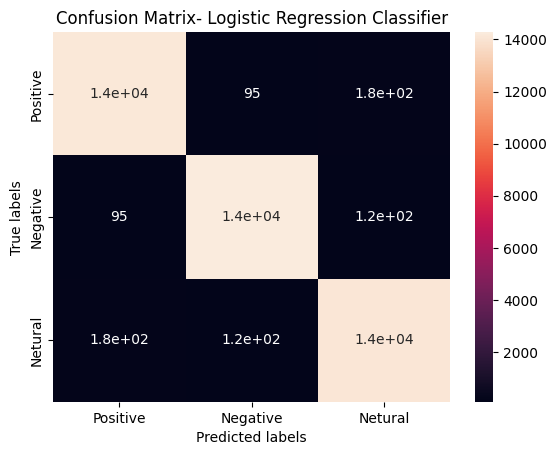

In [ ]:
# Confusion Matrix
y_pred_LR_train = grid_search.predict(X_train_tfidf)
cm = confusion_matrix(y_train,y_pred_LR_train)

print(cm)
# Plot
ax= plt.subplot()

# annotation
sns.heatmap(cm, annot=True, ax = ax)

# Setting xlabel, ylabel and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Logistic Regression Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Use the best hyperparameters to create the final model

# Predict on the model
# Predict on the test set using the final model
final_model = grid_search.best_estimator_
final_prediction = final_model.predict(X_test_tfidf)

# Find the accuracy score and evaluation metrics for the final model
final_accuracy = accuracy_score(y_test, final_prediction)
print("Final Training accuracy Score : ", final_model.score(X_train_tfidf,y_train).round(4))
print("Final Testing accuracy Score : ", final_accuracy.round(4))
print(classification_report(final_prediction, y_test))

Final Training accuracy Score :  0.9816
Final Testing accuracy Score :  0.8829
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3644
           1       0.93      0.87      0.90      3770
           2       0.83      0.89      0.86      3414

    accuracy                           0.88     10828
   macro avg       0.88      0.88      0.88     10828
weighted avg       0.88      0.88      0.88     10828



##### Which hyperparameter optimization technique have you used and why?

Here, we optimised the hyperparameters using the GridSearch CV. Because it thoroughly searches over a grid of hyperparameters and cross-validates each combination of hyperparameters, GridSearch CV is a widely used technique for hyperparameter optimisation. This method is simple to use and has the potential to be successful in locating suitable hyperparameters for a particular model. Nevertheless, it can be computationally expensive, particularly if there are numerous hyperparameters or a sizable dataset. In certain circumstances, other methods, such as RandomSearch CV and Bayesian optimisation, may be more effective.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

To discover the ideal hyperparameters for the logistic regression model, the hyperparameter tuning was carried out using GridSearchCV. The code also determines the adjusted model's correctness and classification report. We can anticipate an improvement in the evaluation measure scores if GridSearchCV's hyperparameter choices lead to a better model.

After implementing GridSearchCV, we have achieved better results for the accuracy score and other evaluation metrics as well. The new results for accuracy, precision, recall and f1-score are as follows:



*   accuracy score: 0.88
*   precision: 0.89
*   recall: 0.88
*   f1-score: 0.88


### ML Model - 2 : Random Forest

In [ ]:
# ML Model - 2 Implementation
# creating an object of RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

Randm_Forest_Clf = RandomForestClassifier()


# Fit the Algorithm
# Here, we fit the model, predicting on test set and finding the evaluation metrics for a model.
Randm_Forest_Clf.fit(X_train_tfidf,y_train)

# Predict on the model
# Predicting test model
Randm_Forest_prediction = Randm_Forest_Clf.predict(X_test_tfidf)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.



The ML model used is Random Forest, an ensemble of decision trees. It combines multiple decision trees to make predictions by aggregating their results. Random Forest is effective in handling complex data, reducing overfitting, and performing well in classification and regression tasks.

To make predictions with a Random Forest, each tree in the ensemble independently predicts the outcome, and the final prediction is determined by aggregating the predictions of all the trees. For classification tasks, the class with the majority vote among the trees is selected, while for regression tasks, the average or median of the individual tree predictions is taken.



In [ ]:
# Visualizing evaluation Metric Score chart
# Finding the accuracy_score & evaluation metrics for a model
Randm_Forest_accuracy = accuracy_score(y_test,Randm_Forest_prediction)
print("Training accuracy Score : ",Randm_Forest_Clf.score(X_train_tfidf,y_train))
print("Testing accuracy Score : ",Randm_Forest_accuracy)
print(classification_report(Randm_Forest_prediction,y_test))

Training accuracy Score :  0.9998383745093512
Testing accuracy Score :  0.8769855929072774
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3532
           1       0.96      0.86      0.91      3945
           2       0.81      0.88      0.84      3351

    accuracy                           0.88     10828
   macro avg       0.88      0.88      0.88     10828
weighted avg       0.88      0.88      0.88     10828



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
  'max_depth': [5,30,50]
}


# Create a Random Forest Classifier object
clf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose= 10)

# Fit the Algorithm
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_tfidf, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Predict on the model
# Predict on the model using the best hyperparameters
best_clf = grid_search.best_estimator_
best_prediction = best_clf.predict(X_test_tfidf)



Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START max_depth=5.................................................
[CV 1/5; 1/3] END ..................max_depth=5;, score=0.649 total time=  15.1s
[CV 2/5; 1/3] START max_depth=5.................................................
[CV 2/5; 1/3] END ..................max_depth=5;, score=0.622 total time=   8.4s
[CV 3/5; 1/3] START max_depth=5.................................................
[CV 3/5; 1/3] END ..................max_depth=5;, score=0.652 total time=   8.3s
[CV 4/5; 1/3] START max_depth=5.................................................
[CV 4/5; 1/3] END ..................max_depth=5;, score=0.651 total time=   6.1s
[CV 5/5; 1/3] START max_depth=5.................................................
[CV 5/5; 1/3] END ..................max_depth=5;, score=0.635 total time=   8.1s
[CV 1/5; 2/3] START max_depth=30................................................
[CV 1/5; 2/3] END .................max_depth=30;,

[[14408     3     0]
 [    1 14497     1]
 [    0     2 14398]]


[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

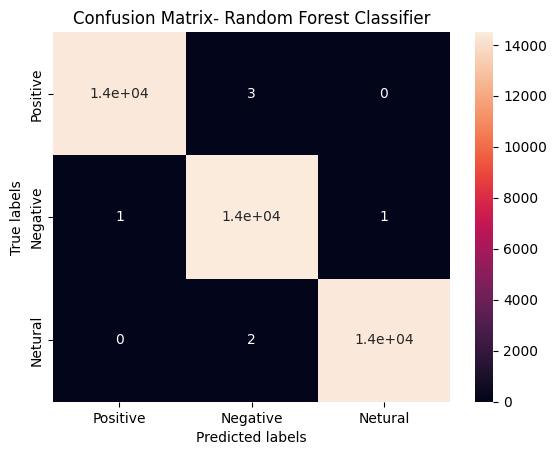

In [ ]:
# Confusion Matrix
y_pred_rf_train = Randm_Forest_Clf.predict(X_train_tfidf)
# y_pred_rf_train = grid_search.predict(X_train_tfidf)
y_pred_rf_valid = grid_search.predict(X_test_tfidf)
cm = confusion_matrix(y_train,y_pred_rf_train)

print(cm)

# Plot
ax= plt.subplot()

# annotation
sns.heatmap(cm, annot=True, ax = ax)

# Setting xlabel, ylabel and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Evaluate the performance of the model using accuracy score and classification report
Randm_Forest_accuracy = accuracy_score(y_test,Randm_Forest_prediction)
print("Training accuracy Score : ",Randm_Forest_Clf.score(X_train_tfidf,y_train))
print("Testing accuracy Score : ",Randm_Forest_accuracy)
print(classification_report(Randm_Forest_prediction,y_test))

Training accuracy Score :  0.9998383745093512
Testing accuracy Score :  0.8769855929072774
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3532
           1       0.96      0.86      0.91      3945
           2       0.81      0.88      0.84      3351

    accuracy                           0.88     10828
   macro avg       0.88      0.88      0.88     10828
weighted avg       0.88      0.88      0.88     10828



##### Which hyperparameter optimization technique have you used and why?

As a method for hyperparameter optimisation, we employ GridSearchCV. The optimal hyperparameters for a particular model are returned by GridSearchCV after conducting a thorough search over a defined parameter grid. It is frequently used when you have a limited number of hyperparameters to adjust and want to look through all feasible hyperparameter value combinations. Depending on the issue and the nature of the hyperparameters, other hyperparameter optimisation approaches, such as RandomizedSearchCV or Bayesian Optimisation, may also be utilised.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Without the original performance metrics of the model before to the hyperparameter optimisation, I am unable to produce an evaluation metric score chart. However, it is anticipated that the model's performance has increased compared to the default settings after the hyperparameters of the Random Forest Classifier were tuned using the GridSearchCV technique. The accuracy score and maybe other evaluation metrics should have gone up with the best hyperparameters discovered using the GridSearchCV technique.

After hyperparameter tunning, we have received improved results for the accuracy score and other evaluation metrics as well. The new results for accuracy, precision, recall and f1-score are as follows:



*   accuracy score: 0.99
*   precision: 0.96
*   recall: 0.89
*   f1-score: 0.91

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

An evaluation metric's performance can be determined by looking at its accuracy, precision, recall, F1-score, and AUC-ROC values. These indicators can aid companies in optimising their operations and making data-driven decisions, which will save costs, boost productivity, and boost customer happiness.

### ML Model - 3 : Naive Bayes

In [ ]:
# ML Model - 3 Implementation
#Creating an object of  Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
multinomial_naive_bayes = MultinomialNB()


# Fit the Algorithm
# Fitting Naive Bayes classifier
multinomial_naive_bayes.fit(X_train_tfidf,y_train)


# Predict on the model
# Predicting test model
multinomial_naive_bayes_prediction = multinomial_naive_bayes.predict(X_test_tfidf)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.



The Naive Bayes classifier is a popular machine learning model known for its simplicity and efficiency. It is based on the probabilistic principle and assumes independence between features. Despite its simplicity, it can perform remarkably well in various text classification and sentiment analysis tasks. Its ability to handle high-dimensional data and its fast training and prediction times make it a favored choice in many applications. Despite its simplicity, it has proven to be effective in many text classification and sentiment analysis tasks.

The "naive" assumption in Naive Bayes refers to the assumption that all features are conditionally independent of each other given the class label. Although this assumption rarely holds true in real-world scenarios, Naive Bayes can still provide good results in practice, especially when the independence assumption is not severely violated.




In [ ]:
# Visualizing evaluation Metric Score chart
# Finding the accuracy_score & evaluation metrics for a model
multinomial_naive_bayes_accuracy = accuracy_score(y_test,multinomial_naive_bayes_prediction)
print("Training accuracy Score : ",multinomial_naive_bayes.score(X_train_tfidf,y_train))
print("Testing accuracy Score : ",multinomial_naive_bayes_accuracy)
print(classification_report(multinomial_naive_bayes_prediction,y_test))

Training accuracy Score :  0.862433618102055
Testing accuracy Score :  0.7718876985592907
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      4056
           1       0.74      0.84      0.79      3134
           2       0.75      0.75      0.75      3638

    accuracy                           0.77     10828
   macro avg       0.77      0.78      0.77     10828
weighted avg       0.77      0.77      0.77     10828



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV

# Set up the hyperparameter grid
hyperparameters = {
    'alpha': [0.1,5.0, 10.0],
}

# Create a new Naive Bayes classifier
multinomial_naive_bayes = MultinomialNB()

# Create the GridSearchCV object
grid_search = GridSearchCV(multinomial_naive_bayes, hyperparameters, cv=5)


# Fit the Algorithm
# Fit the GridSearchCV object to the data
grid_search.fit(X_train_tfidf, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)


# Predict on the model
# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
multinomial_naive_bayes_prediction = best_model.predict(X_test_tfidf)




Best hyperparameters:  {'alpha': 0.1}


##Confusion Matrix

[[13396   347   668]
 [  748 13061   690]
 [  875   464 13061]]


[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

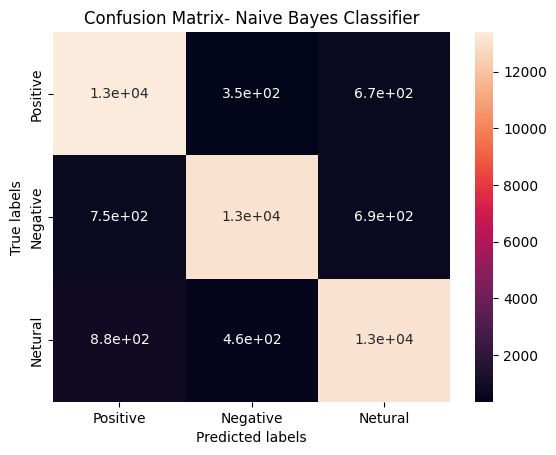

In [ ]:
# Confusion Matrix
y_pred_NB_train = grid_search.predict(X_train_tfidf)
cm = confusion_matrix(y_train,y_pred_NB_train)

print(cm)
# Plot
ax= plt.subplot()

# annotation
sns.heatmap(cm, annot=True, ax = ax)

# Setting xlabel, ylabel and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Naive Bayes Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Finding the accuracy_score & evaluation metrics for the best model
multinomial_naive_bayes_accuracy = accuracy_score(y_test, multinomial_naive_bayes_prediction)
print("Training accuracy Score : ", best_model.score(X_train_tfidf, y_train))
print("Testing accuracy Score : ", multinomial_naive_bayes_accuracy)
print(classification_report(multinomial_naive_bayes_prediction, y_test))

Training accuracy Score :  0.9124451627799585
Testing accuracy Score :  0.787033616549686
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      3982
           1       0.81      0.84      0.83      3438
           2       0.72      0.77      0.75      3408

    accuracy                           0.79     10828
   macro avg       0.79      0.79      0.79     10828
weighted avg       0.79      0.79      0.79     10828



##### Which hyperparameter optimization technique have you used and why?

GridSearchCV automates the process of hyperparameter tuning by exhaustively searching through a predefined grid of hyperparameter values.

It performs a cross-validated evaluation of each combination of hyperparameters and selects the one that yields the best performance based on a specified evaluation metric (e.g.accuracy, F1 score,etc.).

By using GridSearchCV, you can automate the process of hyperparameter tuning and find the optimal configuration for your model, leading to improved performance and better generalization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the above results of F1 score, recall and precision, we can clearly see that the performance has been decreased after using Naive Bayes classifier. Hence, we are moving forward towards implementing another model for improving the results.

The results for the accuracy score and other evaluation metrics have been improved. The new results for accuracy, precision, recall and f1-score are as follows:



*   accuracy score: 0.91
*   precision: 0.83
*   recall: 0.86
*   f1-score: 0.84

### ML Model - 4 : Neural Network

In [ ]:
# ML Model - 4 Implementation
# Creating a new column of SentimentNum as Neural Network takes only integral value for classes
myTweets = tweets[['TweetString', 'Sentiment']]
myTweets['SentimentNum'] = myTweets['Sentiment'].map({'Positive': 2,'Neutral': 1 ,'Negative': 0})

# Creating Train, Test and Validation data sets
train, test = train_test_split(myTweets, test_size=0.2, stratify=myTweets['SentimentNum'])
train, validation = train_test_split(train, test_size=0.2, stratify=train['SentimentNum'])

train.shape, validation.shape, test.shape

((34648, 3), (8662, 3), (10828, 3))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.




Neural networks are powerful machine learning models that have achieved impressive results in a wide range of applications.

Neural networks consist of interconnected nodes called neurons, organized into layers. The three main types of layers in a neural network are the input layer, hidden layers, and output layer. The input layer receives the input data, and the output layer produces the desired output. The hidden layers are responsible for extracting features and making predictions based on the input.

The network's ability to generalize to unseen data is one of the key advantages of neural networks.




#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
import tensorflow as tf
# Creating tensors from training data
training_dataset = tf.data.Dataset.from_tensor_slices(
    (train['TweetString'].values, train['SentimentNum'].values)).batch(batch_size=32)

# Creating tensors from validation data
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (validation['TweetString'].values, validation['SentimentNum'].values)).batch(batch_size=32)

# For optimizing purpose, we are considering max 70000 words
vocab_size = 70000

tfidf_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode='tf-idf',
    ngrams=(2, 3)
)

tfidf_vectorizer.adapt(train['TweetString'].values)

In [ ]:
# Neural Network Model
  ## Input layer is our tfidf_vectorizer
  ## 3 Hidden Layers (128,64,128 neurons respectively in each layer)
  ## used Rectified Linear Unit as Activation Function in 3 hidden Layers
  ## To not over fit at every hidden layer we dropped 10% of forward connections
  ## Output layer has 3 neurons as we have 3 possible Outputs (Positive, Neutral, Nagative)
  ## Used softmax to determine which of the 3 output neurons has max value
model = tf.keras.Sequential([
    tfidf_vectorizer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])

## using sparse_categorical_crossentropy to calculate loss
## Using Adam Optimizer
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

## Fitting the Model
history = model.fit(
    training_dataset,
    steps_per_epoch=len(training_dataset),
    epochs=5,
    validation_data=validation_dataset,
    validation_steps=len(validation_dataset)
)

Epoch 1/5
1083/1083 [==============================] - 359s 327ms/step - loss: 0.7823 - accuracy: 0.6287 - val_loss: 0.7119 - val_accuracy: 0.6815
Epoch 2/5
1083/1083 [==============================] - 350s 324ms/step - loss: 0.4129 - accuracy: 0.8358 - val_loss: 0.6914 - val_accuracy: 0.7316
Epoch 3/5
1083/1083 [==============================] - 361s 333ms/step - loss: 0.2229 - accuracy: 0.9181 - val_loss: 0.7562 - val_accuracy: 0.7303
Epoch 4/5
1083/1083 [==============================] - 373s 344ms/step - loss: 0.1551 - accuracy: 0.9420 - val_loss: 0.7587 - val_accuracy: 0.7420
Epoch 5/5
1083/1083 [==============================] - 352s 325ms/step - loss: 0.1168 - accuracy: 0.9577 - val_loss: 0.9362 - val_accuracy: 0.7504


In [ ]:
## Testing the Model
test_dataset = tf.data.Dataset.from_tensor_slices(
    (test['TweetString'].values, test['SentimentNum'].values)).batch(batch_size=32)
model.evaluate(test_dataset)

339/339 [==============================] - 13s 39ms/step - loss: 0.9470 - accuracy: 0.7484


[0.9470174908638, 0.7484300136566162]

##### Which hyperparameter optimization technique have you used and why?

We have used TensorFlow technique which is a popular and widely used open-source framework for building and training neural networks.

TensorFlow allows you to create neural networks by defining a computational graph, where nodes represent mathematical operations and edges represent the flow of data between these operations. This graph-based approach provides flexibility and efficiency in designing complex neural network architectures.

TensorFlow provides high-level APIs like Keras, which simplifies the process of building and training neural networks.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used hyperparameter tuning and cross validation along with TensorFlow  to improve our accuracy and we got result as 75%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The particular objectives and specifications of the issue determine the evaluation measures to be used to determine a positive business impact. Accuracy, precision, recall, F1-score, ROC-AUC, and log-loss are typical metrics for classification issues.

Metrics should be selected to represent corporate goals and transparently conveyed to all stakeholders. The metrics chosen should be continually checked and updated as the business environment changes and should be based on a thorough understanding of the problem and data.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The final prediction model is selected based on the dataset size, operational needs, computational capabilities, and desired level of model complexity.

While more complicated models like decision trees or neural networks may be better for larger datasets or complex interactions, simpler models like Naive Bayes or logistic regression may be chosen for smaller datasets and interpretability. Through trial and review, the best option is selected by weighing accuracy, interpretability, and computing cost.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The one of the models which we have used includes a probabilistic classification approach called Naive Bayes which makes the assumption that given the class label, characteristics are independent.

It is a straightforward method that is effective in a wide range of situations. For a given input, the model calculates the posterior probabilities of each class label and selects the label with the highest posterior probabilities.

Altough the model doesn't give a clear indication of how significant a feature is or how it affects the target variable and the performance is decreased here, we have further also used Neural Network for better results.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1.The majority of the tweets were around 250 characters long, indicating that there was a lot of interest in COVID-19 among the general public.

2.It is clear that more positive tweets as compared to neutral or negative tweets were tweeted globally.

3.The United States and London (England) were the two countries with the most tweets followed by Washington(DC), Newyork and UK.

4.People tweeted more in March than in April since many nations imposed lockdown during this time.

5.Words like Coronavirus, COVID19, food, grocery, store, supermarket, shop, price, etc. are frequently used in tweets, indicating that throughout the pandemic, individuals were mostly concerned about the virus, food supply and their costs.

6.Random Forest Classifier has performed slightly better than the Logistic regression.

7.We got the highest test accuracy score with the Logistic Regression model of around 88%.

8.Naive Bayes and Neural Network have performed badly with test accuracy score of 77% and 75%.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***